<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/regression_transportation-demand-prediction/blob/main/regression_Transportation_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Transportation Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

   Increased rural-urban migration has drastically enhanced Nairobi's population in the recent years. The mobility needs of the population is met with mainly two types of services that are bus services and shuttle services. Mobiticket an online ticket booking service has planned to conduct an survey to estimate the number of tickets that will sold by their platform for the routes which start from one of the 14 towns and heading towards Nairobi

 Using the data set created by the mobiticket I have checked for possible duplicate rows and null data points in data set. Using the feature ride id we have found the number of tickets booked on the time period which is the dependent variable. Also I have conducted an Exploratory Data Analysis to understand different features in the data set and carried out different analyses like most preferred time for travel, Number of tickets booked Vs Travel date, month wise booking analysis and weekday booking analysis and route wise booking analysis.
    Further, I have performed Feature Engineering by dropping unnecessary features and features that are highly correlated with each other. I have created features for time of travel, distance of travel and calculated the average speed of travel. Further, I have created a feature for waiting time for the next bus.
    Using the new updated data set I have conducted Feature scaling of the data using z score to deal with any outliers present in the data set and I have created a test train split of the data and implemented different regression like Linear Regression, Lasso, Ridge, Elasticnet, decision tree, gradient boosting, extreme gradient boosting and random forest regression and evaluated the performance metrics like mean squared error (MSE), Root Mean Squared error (RMSE), R2Score on train and test score to asses the performance of the regression algorithm and perform Bias- Variance Trade off and increase the performance of the regression.     
     After performing the performance metrics for all the regressions I have found that Random forest regression have performed the best in terms of Bias and variance when evaluated using R2 score with a R2 score on Train data with 63.46% and R2 score on test with 63.93%.

# **GitHub Link -**

https://github.com/anandkona/transport-demand-prediction-system

# **Problem Statement**


**Business Problem Overview**

   Ticket sales demand prediction plays a very important role in determining the pricing strategy for the logistics companies.
   Companies strategically plan to maximize the profits in the days with high demand in tickets and try to increase the sales on low demand days by offering promotions. 

   Also the companies try to predict the sales of the ride to sell other services more effectively such as micro travel insurances. 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime
import calendar
import scipy.stats as stat
import pylab
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Data
path='/content/drive/MyDrive/regression project/'
df=pd.read_csv(path + 'train_revised.csv')

### Dataset First View

In [ ]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0         1442         15A          Mpesa      UZUEHCBUSO    17-10-17   
1         5437         14A          Mpesa      TIHLBUSGTE    19-11-17   
2         5710          8B          Mpesa      EQX8Q5G19O    26-11-17   
3         5777         19A          Mpesa      SGP18CL0ME    27-11-17   
4         5778         11A          Mpesa      BM97HFRGL9    27-11-17   
...        ...         ...            ...             ...         ...   
51640    13826          9B          Mpesa      8V2XDDZR6V    20-04-18   
51641    13809         18A          Mpesa      4PEBSVJSNK    20-04-18   
51642    13809         17A          Mpesa      LVN64LZDNN    20-04-18   
51643    13796         16B          Mpesa      REYBSKTYWN    20-04-18   
51644    14304           7          Mpesa      AQN7FBUSGP    14-11-17   

      travel_time travel_from travel_to car_type  max_capacity  
0            7:15      Migori   Nairobi      Bus            49  
1            7:12      Migori   Nairobi      Bus            49  
2            7:05      Keroka   Nairobi      Bus            49  
3            7:10    Homa Bay   Nairobi      Bus            49  
4            7:12      Migori   Nairobi      Bus            49  
...           ...         ...       ...      ...           ...  
51640        8:00      Awendo   Nairobi      Bus            49  
51641        8:00      Migori   Nairobi      Bus            49  
51642        8:00      Migori   Nairobi      Bus            49  
51643        7:08      Awendo   Nairobi      Bus            49  
51644        5:10       Kisii   Nairobi      Bus            49  

[51645 rows x 10 columns]

In [ ]:
data_df=df.copy()

### Dataset Rows & Columns count

In [ ]:

df.shape

(51645, 10)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [ ]:
# Checking for duplicates
duplicate_rows=df[df.duplicated()]

In [ ]:
duplicate_rows# Dataset Duplicate Value Count
len(duplicate_rows)

0

#### Missing Values/Null Values

In [ ]:


# Checking null values
df.isna().sum().sort_values(ascending=False)

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

### What did you know about your dataset?

The dataset given is a dataset from Mobiticket, and we have to predict the number of tickets that are expected to be sold for each ride.

The above dataset has 51645 rows and 10 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe()

ride_id  max_capacity
count  51645.000000  51645.000000
mean   10188.645793     34.534321
std     2211.295708     18.451193
min     1442.000000     11.000000
25%     8287.000000     11.000000
50%    10353.000000     49.000000
75%    12029.000000     49.000000
max    20117.000000     49.000000

In [ ]:
df.describe(include='object')

seat_number payment_method payment_receipt travel_date travel_time  \
count        51645          51645           51645       51645       51645   
unique          61              2           51645         149          78   
top              1          Mpesa      UZUEHCBUSO    10-12-17        7:09   
freq          2065          51532               1         856        3926   

       travel_from travel_to car_type  
count        51645     51645    51645  
unique          17         1        2  
top          Kisii   Nairobi      Bus  
freq         22607     51645    31985

### Variables Description 

* **ride_id         :** Unique id for ride.
* **seat_number     :** Seat number of the ride.
* **payment_method  :** Categorical value for mode of payment. (Mpesa or cash)
* **payment_receipt :** Unique id for receipt of payment.
* **travel_date     :** Date of travel. 
* **travel_time     :** Starting time of travel.
* **travel_from     :** Ride starting location.
* **travel_to       :** Ride destination location.
* **car_type        :** Category variable for type of vehicle. (Bus or Shuttle)
* **max_capacity    :** Maximum capacity of the vehicle.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  ride_id is 6249 .
No. of unique values in  seat_number is 61 .
No. of unique values in  payment_method is 2 .
No. of unique values in  payment_receipt is 51645 .
No. of unique values in  travel_date is 149 .
No. of unique values in  travel_time is 78 .
No. of unique values in  travel_from is 17 .
No. of unique values in  travel_to is 1 .
No. of unique values in  car_type is 2 .
No. of unique values in  max_capacity is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

Creating column for independent variable (Number of Ticket)

In [ ]:
Ticket_df=df.groupby(["ride_id","travel_date","travel_time","max_capacity","travel_from"]).seat_number.count().rename("number_of_ticket").reset_index()
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442    17-10-17        7:15            49      Migori   
1        5437    19-11-17        7:12            49      Migori   
2        5710    26-11-17        7:05            49      Keroka   
3        5777    27-11-17        7:10            49    Homa Bay   
4        5778    27-11-17        7:12            49      Migori   
...       ...         ...         ...           ...         ...   
6244    20113    07-02-18        7:00            11       Kisii   
6245    20114    12-12-17        7:10            49       Kisii   
6246    20115    06-12-17        7:10            11       Kisii   
6247    20116    27-11-17        7:10            11       Kisii   
6248    20117    27-11-17        5:00            49       Kisii   

      number_of_ticket  
0                    1  
1                    1  
2                    1  
3                    5  
4                   31  
...                ...  
6244                 9  
6245                 4  
6246                 5  
6247                 1  
6248                 1  

[6249 rows x 6 columns]

Travel Date Vs number of tickets

In [ ]:
Ticket_df['travel_date']=pd.to_datetime(Ticket_df['travel_date'], format='%d-%m-%y')

In [ ]:
Ticket_df=Ticket_df.sort_values(by='travel_date')

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  
0                    1  
6241                 1  
1                    1  
2                    1  
5962                11  
...                ...  
6222                 2  
6223                 2  
6225                 1  
6215                20  
6219                12  

[6249 rows x 6 columns]

In [ ]:
Ticket_df['year']=Ticket_df['travel_date'].dt.year
Ticket_df['month']=Ticket_df['travel_date'].dt.month
Ticket_df['day']=Ticket_df['travel_date'].dt.day

Ticket_df['weekday']=Ticket_df['travel_date'].dt.day_name()

In [ ]:

Ticket_df['travel_date']=pd.to_datetime(Ticket_df['travel_date'])


In [ ]:
traveled_date_counts=Ticket_df.groupby('travel_date')['number_of_ticket'].count()

In [ ]:
traveled_date_counts

travel_date
2017-10-17     1
2017-11-14     1
2017-11-19     1
2017-11-26     1
2017-11-27    47
              ..
2018-04-16    50
2018-04-17    45
2018-04-18    45
2018-04-19    42
2018-04-20    41
Name: number_of_ticket, Length: 149, dtype: int64

In [ ]:
b=dict(traveled_date_counts)

In [ ]:
date_values=list(b.keys())
date_ticketcount=list(b.values())

Most preffered Travel Time

In [ ]:
traveled_time_counts=Ticket_df.groupby('travel_time')['number_of_ticket'].count()

In [ ]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

In [ ]:
# sorting in ascending order
traveled_time_counts=traveled_time_counts.sort_index(ascending=True)

In [ ]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

Tickets booked in weekdays analysis

In [ ]:
weekday_count=Ticket_df.groupby('weekday')['number_of_ticket'].count()

In [ ]:
weekday_count

weekday
Friday       1048
Monday        848
Saturday      623
Sunday        924
Thursday      970
Tuesday       865
Wednesday     971
Name: number_of_ticket, dtype: int64

Month wise ticket bookings

In [ ]:
Ticket_df['Month'] = Ticket_df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  
0                    1  2017     10   17  Tuesday   Oct  
6241                 1  2017     11   14  Tuesday   Nov  
1                    1  2017     11   19   Sunday   Nov  
2                    1  2017     11   26   Sunday   Nov  
5962                11  2017     11   27   Monday   Nov  
...                ...   ...    ...  ...      ...   ...  
6222                 2  2018      4   20   Friday   Apr  
6223                 2  2018      4   20   Friday   Apr  
6225                 1  2018      4   20   Friday   Apr  
6215                20  2018      4   20   Friday   Apr  
6219                12  2018      4   20   Friday   Apr  

[6249 rows x 11 columns]

In [ ]:
month_count=Ticket_df.groupby('Month')['number_of_ticket'].count()

In [ ]:
month_count=dict(month_count)

In [ ]:
month_values=list(month_count.keys())
month_ticketcount=list(month_count.values())



Bus Starting location Analysis

In [ ]:
travel_starting=Ticket_df.groupby('travel_from')['number_of_ticket'].count()

In [ ]:
travel_starting

travel_from
Awendo        185
Homa Bay      356
Kehancha      172
Kendu Bay       1
Keroka        312
Keumbu         20
Kijauri       556
Kisii        3020
Mbita          21
Migori        386
Ndhiwa         22
Nyachenge     196
Oyugis          2
Rodi           51
Rongo         738
Sirare        191
Sori           20
Name: number_of_ticket, dtype: int64

In [ ]:
v=dict(travel_starting)
Tstart_loc=list(v.keys())
Tstart_ticketcount=list(v.values())

Most preffered Vehicle

In [ ]:
bustype=Ticket_df.groupby('max_capacity')['number_of_ticket'].count()

In [ ]:
bustype

max_capacity
11    3060
49    3189
Name: number_of_ticket, dtype: int64

New Feature created "waiting time" by Finding time taken for arrival of next bus/shuttle

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  
0                    1  2017     10   17  Tuesday   Oct  
6241                 1  2017     11   14  Tuesday   Nov  
1                    1  2017     11   19   Sunday   Nov  
2                    1  2017     11   26   Sunday   Nov  
5962                11  2017     11   27   Monday   Nov  
...                ...   ...    ...  ...      ...   ...  
6222                 2  2018      4   20   Friday   Apr  
6223                 2  2018      4   20   Friday   Apr  
6225                 1  2018      4   20   Friday   Apr  
6215                20  2018      4   20   Friday   Apr  
6219                12  2018      4   20   Friday   Apr  

[6249 rows x 11 columns]

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  
0                    1  2017     10   17  Tuesday   Oct  
6241                 1  2017     11   14  Tuesday   Nov  
1                    1  2017     11   19   Sunday   Nov  
2                    1  2017     11   26   Sunday   Nov  
5962                11  2017     11   27   Monday   Nov  
...                ...   ...    ...  ...      ...   ...  
6222                 2  2018      4   20   Friday   Apr  
6223                 2  2018      4   20   Friday   Apr  
6225                 1  2018      4   20   Friday   Apr  
6215                20  2018      4   20   Friday   Apr  
6219                12  2018      4   20   Friday   Apr  

[6249 rows x 11 columns]

Data imported from maps

In [ ]:

distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
Ticket_df["travel_from_distance"]=Ticket_df.travel_from.map(distance)

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
Ticket_df["travel_from_time"]=Ticket_df.travel_from.map(time)

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5962                11  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   
6219                12  2018      4   20   Friday   Apr                 348.0   

      travel_from_time  
0                  428  
6241               334  
1                  428  
2                  300  
5962               334  
...                ...  
6222               381  
6223               370  
6225               290  
6215               398  
6219               400  

[6249 rows x 13 columns]

In [ ]:
#Converting Object data type to numeric type
Ticket_df["timeperiod"] = Ticket_df["travel_time"].str.split(':').apply(lambda x: int(x[0]))

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5962                11  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   
6219                12  2018      4   20   Friday   Apr                 348.0   

      travel_from_time  timeperiod  
0                  428           7  
6241               334           5  
1                  428           7  
2                  300           7  
5962               334          10  
...                ...         ...  
6222               381           7  
6223               370           7  
6225               290           7  
6215               398           7  
6219               400          23  

[6249 rows x 14 columns]

In [ ]:
Ticket_df['session']=Ticket_df['timeperiod'].apply(lambda x: 1 if (x>=5 and x<=9) else (2 if (x>9 and x<12) else 3))

In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5962                11  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   
6219                12  2018      4   20   Friday   Apr                 348.0   

      travel_from_time  timeperiod  session  
0                  428           7        1  
6241               334           5        1  
1                  428           7        1  
2                  300           7        1  
5962               334          10        2  
...                ...         ...      ...  
6222               381           7        1  
6223               370           7        1  
6225               290           7        1  
6215               398           7        1  
6219               400          23        3  

[6249 rows x 15 columns]

In [ ]:
Ticket_df.loc[Ticket_df['session']==1]

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5919    13423  2017-11-27        7:09            49       Kisii   
...       ...         ...         ...           ...         ...   
6221    13796  2018-04-20        7:08            49      Awendo   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5919                 1  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6221                27  2018      4   20   Friday   Apr                 351.0   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   

      travel_from_time  timeperiod  session  
0                  428           7        1  
6241               334           5        1  
1                  428           7        1  
2                  300           7        1  
5919               334           7        1  
...                ...         ...      ...  
6221               398           7        1  
6222               381           7        1  
6223               370           7        1  
6225               290           7        1  
6215               398           7        1  

[5267 rows x 15 columns]

### What all manipulations have you done and insights you found?

According to my idea, 

In [ ]:

Ticket_df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'max_capacity', 'travel_from',
       'number_of_ticket', 'year', 'month', 'day', 'weekday', 'Month',
       'travel_from_distance', 'travel_from_time', 'timeperiod', 'session'],
      dtype='object')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Most prefered time of travel

<AxesSubplot:title={'center':'Most Prefered Time for Travel'}, xlabel='travel_time'>

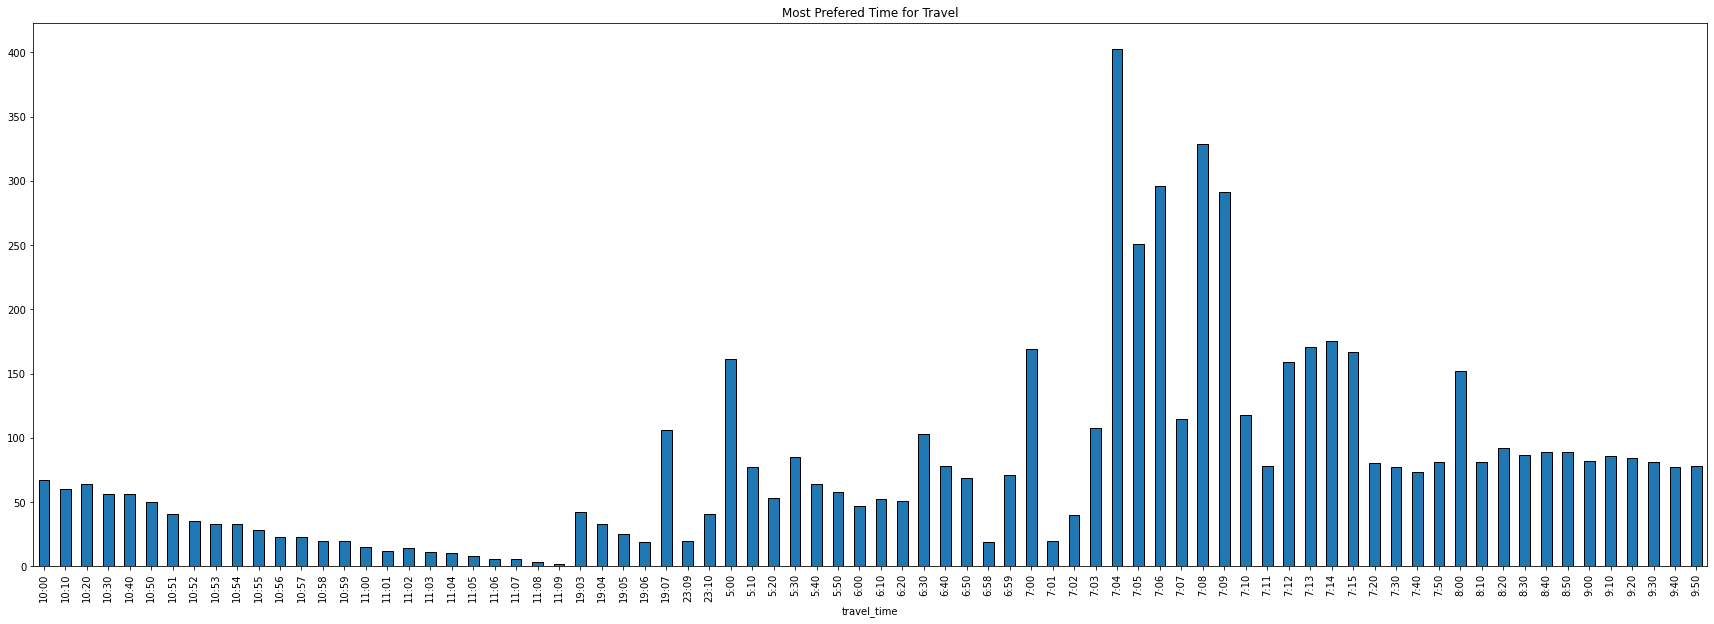

In [ ]:
#Chart 1 visualization code
#Bar Plot between most preffered time vs number of tickets
traveled_time_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Most Prefered Time for Travel')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the most preffered time of travel this chart is plotted between time of travel and number of tickets

##### 2. What is/are the insight(s) found from the chart?

From the above chart we have found that the most travelers book tickets to travel early in the morning from 5:00 to 8:00 AM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the most preferred time of travel helps the business to fix a pricing strategy with slightly higher prices to gain profits from the timings. Also it helps the company to increase the busses in the timings with maximum number of travelers

#### Chart - 2 - Date of Journey Vs Ticket Count

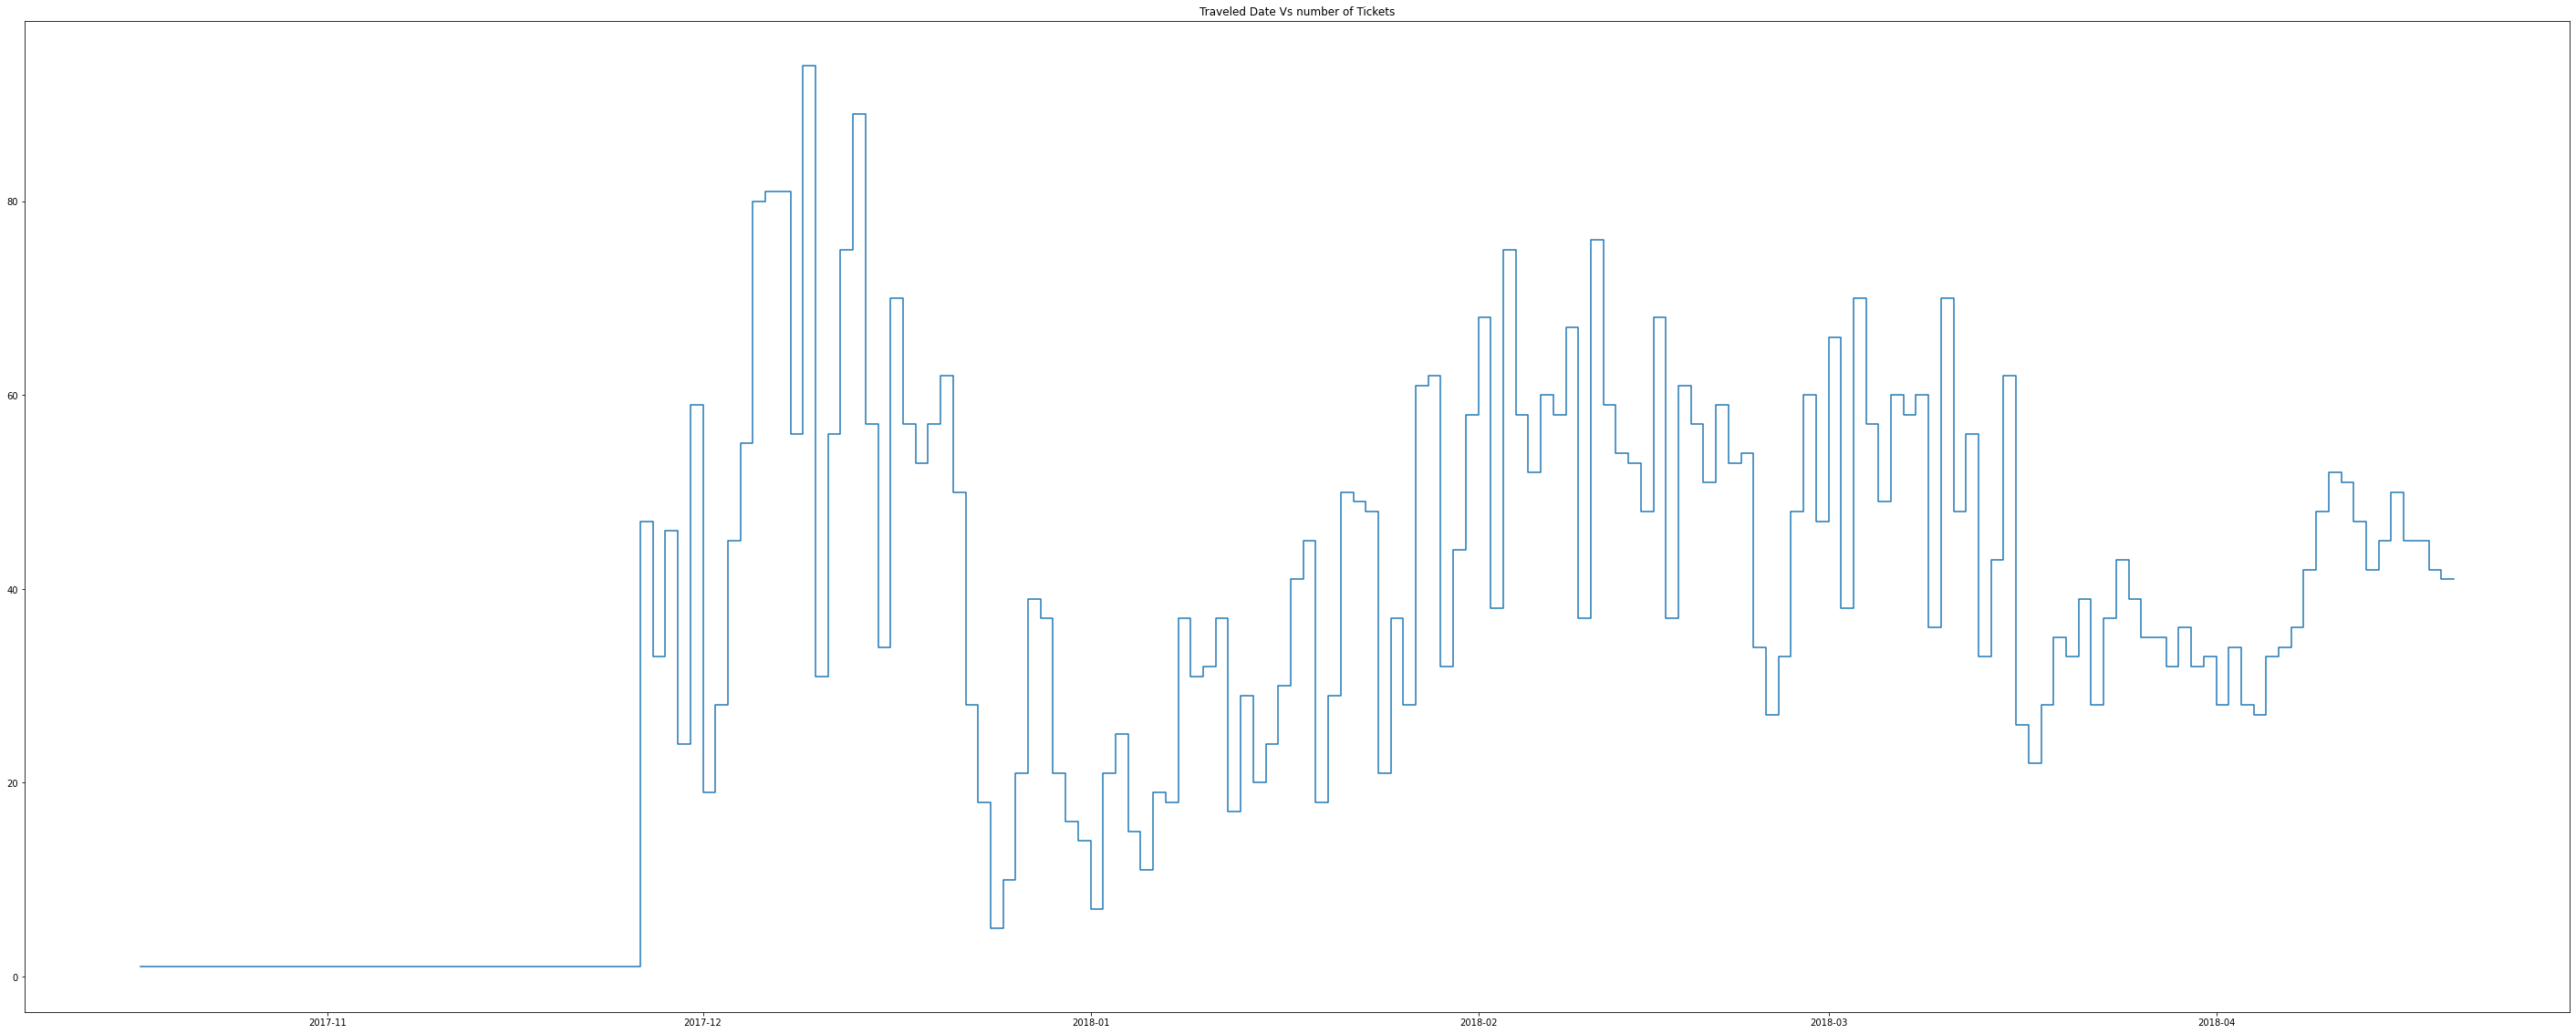

In [ ]:
#Chart 1 visualization code
# step plot of travelled date vs number of tickets
plt.figure(figsize=(50,20))
plt.step(date_values,date_ticketcount)
plt.title('Traveled Date Vs number of Tickets')
plt.show()


##### 1. Why did you pick the specific chart?

 The step chart helps us to know the changes which are hapening in regular interval of time. This plot gives good visualization of time series data as the chart helps to track changes over a long period of time.

 In the graph, I have found the number of tickets sold in the time series from November to April.

##### 2. What is/are the insight(s) found from the chart?

The numbrer of bookings for the month of December is the highest. We can also see an increasing trend in booking from January to mid-March. January has the lowest number of tickets bookings. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the trends in bookings over time helps the business to plan over the time and plan for its pricing strategy. Especially in december pricing can be increased to make profits in the festival season. Also, from the chart we found January has the least bookings followed by an increasing trend in sales of ticket, from this we can say that promotions can be done in january month to increase present sales and attract customers from january to march.  

#### Chart - 3 - Weekday travel Vs Ticket Count

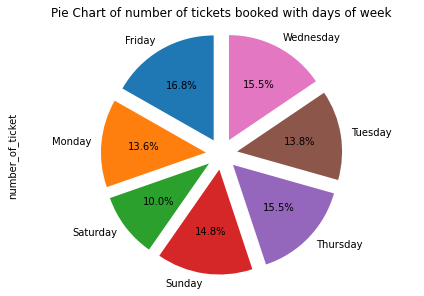

In [ ]:
#Chart 3 visualization code
weekday_count.plot.pie(y=Ticket_df.index,
           shadow=False,
           explode=(0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.title('Pie Chart of number of tickets booked with days of week')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the tickets booked on every days of the week.


##### 2. What is/are the insight(s) found from the chart?

From the pie chart we can find that from saturday to tuesday we have less number of tickets booked with a least booking on saturday of 10.0%. 

From wednesday to friday there are higher number of bookings with Friday being the highest of 16.8 %

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph we can clearly say that the working days have the highest number of bookings. Mobiticket can target to increase the sales from tuesday to Thursday to increase the revenue.

#### Chart - 4 - Month wise booking Analysis

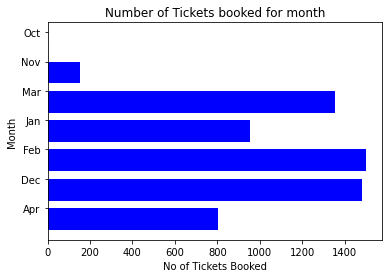

In [ ]:
#chart 4 visualization code
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(month_ticketcount))  # the x locations for the groups
ax.barh(ind, month_ticketcount, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(month_values, minor=False)
plt.title('Number of Tickets booked for month')
plt.xlabel('No of Tickets Booked')
plt.ylabel('Month')      
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of bookings this chart gives a better understanding than chart number 2. (which gives information of trends)

##### 2. What is/are the insight(s) found from the chart?

From the bar chart we can find that Febuary,December and March has the highest number of bookings. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph we can understand the intensity of demand in booking the tickets of each and every month. This helps in understanding the demand in those months and plan for pricing strategy.

#### Chart - 5 - Starting location wise booking Analysis

<StemContainer object of 3 artists>

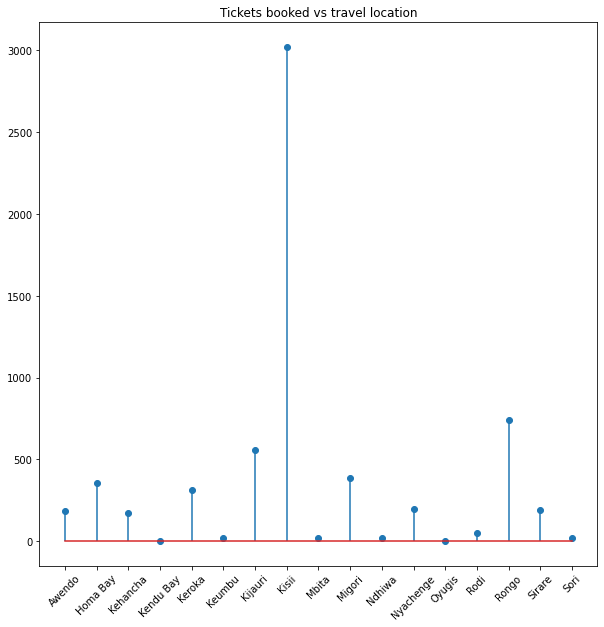

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.title('Tickets booked vs travel location')
plt.stem(Tstart_loc,Tstart_ticketcount)

##### 1. Why did you pick the specific chart?

A stem plot is used to display the values of the data in the form of extended lines from x-axis.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we found that kisii has the highest number of bookings.
Also we can see that some of the routes have very low sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graphs we can see that the route starting from kisii has maximum number of sales. Also we can say that mobiticket is only having bookings in only kissi,kijauri and Rongo. There is a need of marketing in other locations to increase sales.

#### Chart - 6 - Most preffered Vehicle

<AxesSubplot:ylabel='number_of_ticket'>

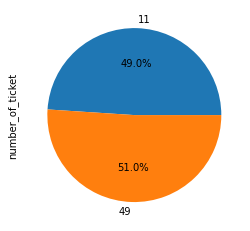

In [ ]:
bustype.plot.pie(y=bustype.index,autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the tickets booked for different capacity of vehicles.


##### 2. What is/are the insight(s) found from the chart?

From the pie chart we can find that both types of vehicles are equally contributing to the number of tickets booked. However shuttle services having a low capacity ( 11 seating capacity ) is contributing a good share in total sales. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this graph we can see that both the services are contributing equally in sales. 

#### Chart - 7 - Correlation Heat Map

In [ ]:
Ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6219
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ride_id               6249 non-null   int64         
 1   travel_date           6249 non-null   datetime64[ns]
 2   travel_time           6249 non-null   object        
 3   max_capacity          6249 non-null   int64         
 4   travel_from           6249 non-null   object        
 5   number_of_ticket      6249 non-null   int64         
 6   year                  6249 non-null   int64         
 7   month                 6249 non-null   int64         
 8   day                   6249 non-null   int64         
 9   weekday               6249 non-null   object        
 10  Month                 6249 non-null   object        
 11  travel_from_distance  6249 non-null   float64       
 12  travel_from_time      6249 non-null   int64         
 13  timeperiod        

In [ ]:
#Converting Date time object to numeric
Ticket_df['dayofyear']=Ticket_df['travel_date'].dt.dayofyear

In [ ]:
Ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ride_id               6249 non-null   int64         
 1   travel_date           6249 non-null   datetime64[ns]
 2   travel_time           6249 non-null   object        
 3   max_capacity          6249 non-null   int64         
 4   travel_from           6249 non-null   object        
 5   number_of_ticket      6249 non-null   int64         
 6   year                  6249 non-null   int64         
 7   month                 6249 non-null   int64         
 8   day                   6249 non-null   int64         
 9   weekday               6249 non-null   object        
 10  Month                 6249 non-null   object        
 11  travel_from_distance  6249 non-null   float64       
 12  travel_from_time      6249 non-null   int64         
 13  timeperiod        

<AxesSubplot:>

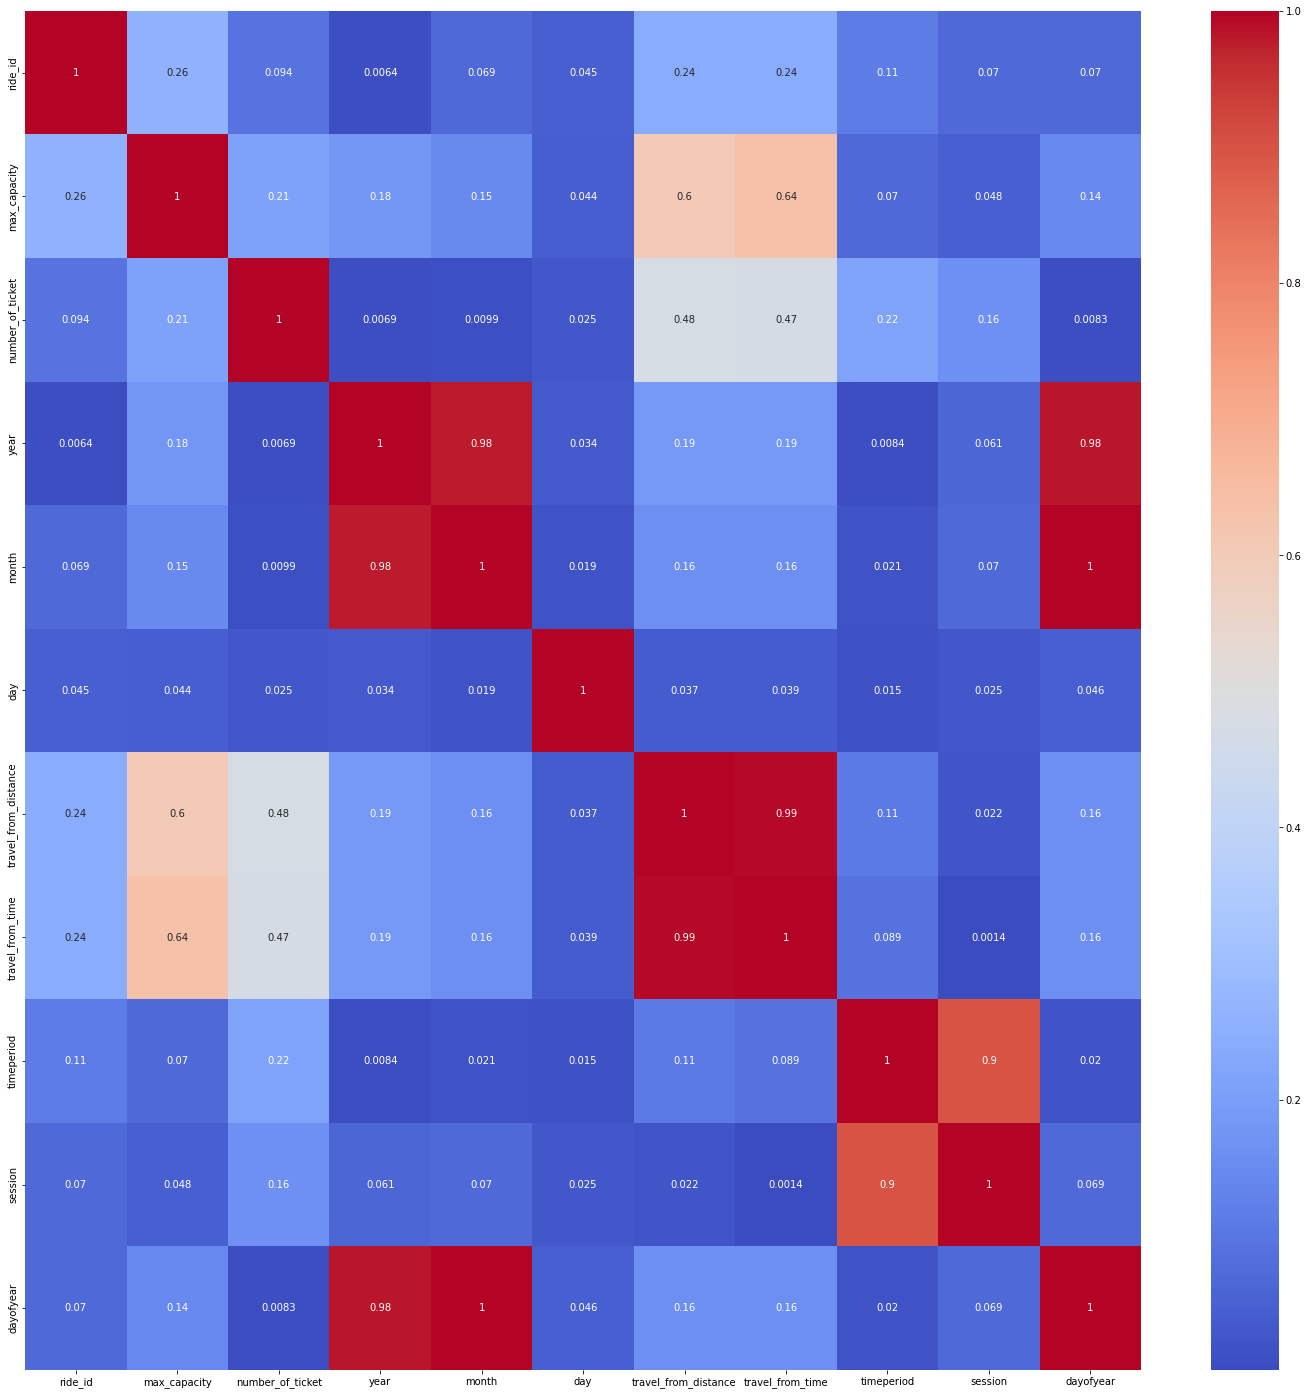

In [ ]:
## Correlation
plt.figure(figsize=(25,25))
correlation = Ticket_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation map we can say month and year is highly correlated with day of year. We can say that these two columns can be dropped beacause all the information present in month and year is stored in the day of month column.
Also month and year are also highly correlated.

Also travel_from_distance, travel_from_time and speed are highly related because the follow the equation speed=distance/time.


In [ ]:
Ticket_df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5962                11  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   
6219                12  2018      4   20   Friday   Apr                 348.0   

      travel_from_time  timeperiod  session  dayofyear  
0                  428           7        1        290  
6241               334           5        1        318  
1                  428           7        1        323  
2                  300           7        1        330  
5962               334          10        2        331  
...                ...         ...      ...        ...  
6222               381           7        1        110  
6223               370           7        1        110  
6225               290           7        1        110  
6215               398           7        1        110  
6219               400          23        3        110  

[6249 rows x 16 columns]

## ***5. Hypothesis Testing***

### Based on the chart experiments,I have defined hypothetical statements from the dataset. In the question,I have performed hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement: The sales of the tickets is highest in Early Morning session (session=1, i.e, from 5:00AM to 9:00AM).

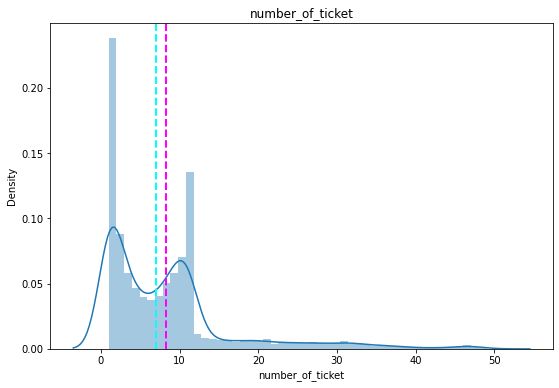

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (Ticket_df["number_of_ticket"])
sns.distplot(Ticket_df["number_of_ticket"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)

ax.set_title('number_of_ticket')
plt.show()

In [ ]:
feature.mean()

8.264522323571772

### Hypothetical Statement 
The sales of the tickets is highest in Early Morning session (session=1, i.e, from 5:00AM to 9:00AM).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Number of tickets is highest in early morning session(between 5:00AM to 9:00 AM)

Alternate Hypothesis : It is not highest

Test Type: One tailed test


In [ ]:
Ticket_EM_session = Ticket_df[Ticket_df.session ==1]
Ticket_other_session = Ticket_df[Ticket_df.session !=1]

(array([2574., 1275.,  788.,  184.,  140.,  123.,  100.,   45.,   16.,
          22.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

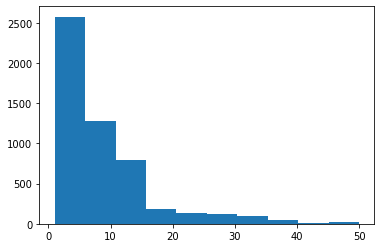

In [ ]:
plt.hist(Ticket_EM_session['number_of_ticket'])

(array([310., 300., 254.,  11.,  17.,  13.,  21.,  15.,  13.,  28.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

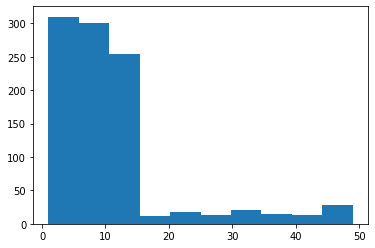

In [ ]:
plt.hist(Ticket_other_session['number_of_ticket'])

In [ ]:
pop_mean_EM = Ticket_EM_session['number_of_ticket'].mean()
pop_std_EM = statistics.stdev(Ticket_df.number_of_ticket)
print("Population Mean: "+str(pop_mean_EM))
print("Population Standard Deviation: "+str(pop_std_EM))

Population Mean: 7.890449971520789
Population Standard Deviation: 8.632967516263776


In [ ]:
pop_mean_other = Ticket_other_session['number_of_ticket'].mean()
print("Population Mean: "+str(pop_mean_other))
Ticket_other_session_sample = Ticket_other_session.sample(frac=0.10)
sample_mean_Ticket_other_session=Ticket_other_session_sample['number_of_ticket'].mean()
print("Sample Mean: "+str(sample_mean_Ticket_other_session))
sample_std_other = statistics.stdev(Ticket_other_session_sample.number_of_ticket)
print("Sample Standard Deviation: "+str(sample_std_other))


Population Mean: 10.270875763747455
Sample Mean: 9.173469387755102
Sample Standard Deviation: 8.52893862240938


In [ ]:
pop_mean_EM

7.890449971520789

In [ ]:
pop_mean_other

10.270875763747455

In [ ]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
size=len(Ticket_other_session_sample)
# Calculate the test statistics 
zscore_test_stat = (( sample_mean_Ticket_other_session- pop_mean_EM)*math.sqrt(size))/sample_std_other
print(zscore_test_stat)

1.4891939990298577


From lookup tables we found that P=0.0016

AS Z>1.645 we reject null hypothesis.
This concludes that the there is no sufficient evidence to say that the number of tickets booked is highest in early morning session i.e, between 5:00 AM to 9:00 AM. 

In [ ]:
xm=1.645*sample_std_other/math.sqrt(size)+pop_mean_EM

In [ ]:
xm

9.307704500534728

From the value of z =1.645 we found that the null hypothesis is rejected when the sample mean of other sessions is greater than 9.778691885795855

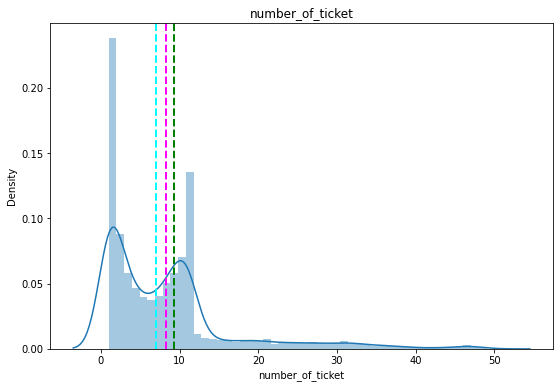

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (Ticket_df["number_of_ticket"])
sns.distplot(Ticket_df["number_of_ticket"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.axvline(xm,color='green', linestyle='dashed', linewidth=2)
ax.set_title('number_of_ticket')
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df=Ticket_df

### 1. Handling Missing Values

ride_id                 0
travel_date             0
travel_time             0
max_capacity            0
travel_from             0
number_of_ticket        0
year                    0
month                   0
day                     0
weekday                 0
Month                   0
travel_from_distance    0
travel_from_time        0
timeperiod              0
session                 0
dayofyear               0
dtype: int64


<AxesSubplot:>

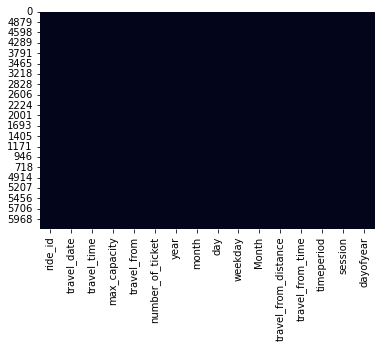

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
6241                 1  2017     11   14  Tuesday   Nov                 305.1   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
5962                11  2017     11   27   Monday   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20   Friday   Apr                 332.0   
6223                 2  2018      4   20   Friday   Apr                 326.0   
6225                 1  2018      4   20   Friday   Apr                 271.0   
6215                20  2018      4   20   Friday   Apr                 351.0   
6219                12  2018      4   20   Friday   Apr                 348.0   

      travel_from_time  timeperiod  session  dayofyear  
0                  428           7        1        290  
6241               334           5        1        318  
1                  428           7        1        323  
2                  300           7        1        330  
5962               334          10        2        331  
...                ...         ...      ...        ...  
6222               381           7        1        110  
6223               370           7        1        110  
6225               290           7        1        110  
6215               398           7        1        110  
6219               400          23        3        110  

[6249 rows x 16 columns]

### 2. Handling Outliers

In [ ]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

In [ ]:
# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)


Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['ride_id', 'max_capacity', 'number_of_ticket', 'year', 'month', 'day', 'travel_from_distance', 'travel_from_time', 'timeperiod', 'session', 'dayofyear']


In [ ]:
def plot_data(data,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)
  plt.show()

In [ ]:
for col in symmetric_feature[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['number_of_ticket']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('number of tickets')
    ax.set_title('number of ticket vs ' + col)
    z = np.polyfit(df[col], df['number_of_ticket'], 1)
    y_hat = np.poly1d(z)(df[col])


    plt.plot(df[col], y_hat)

plt.show()

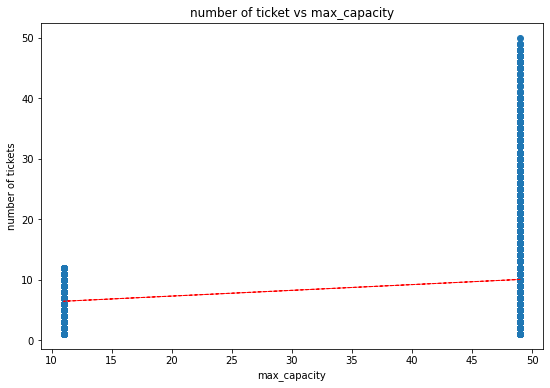

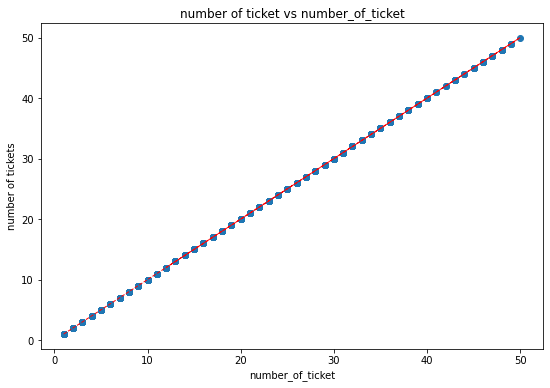

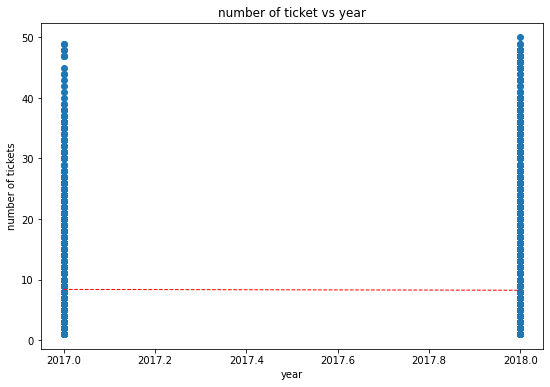

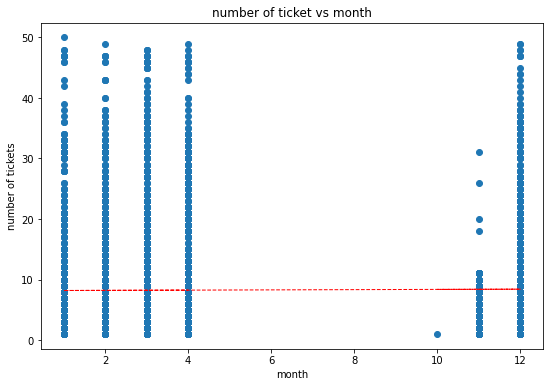

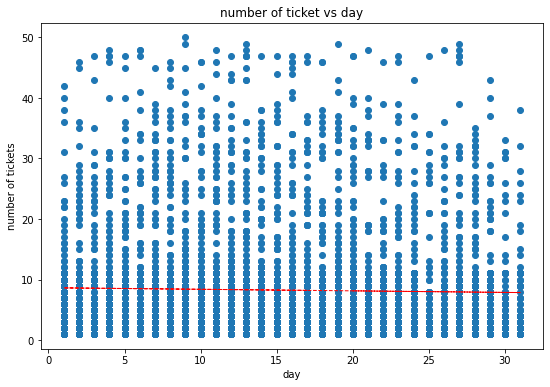

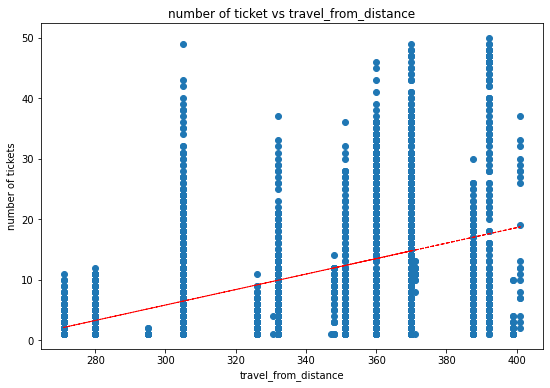

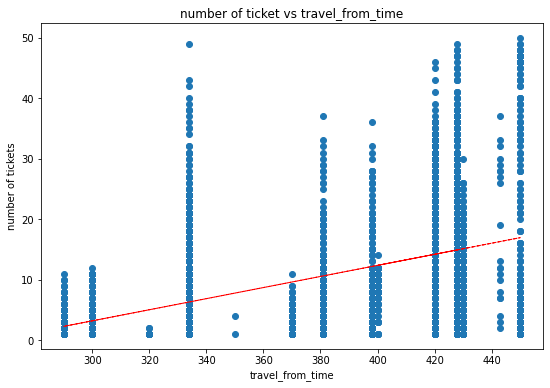

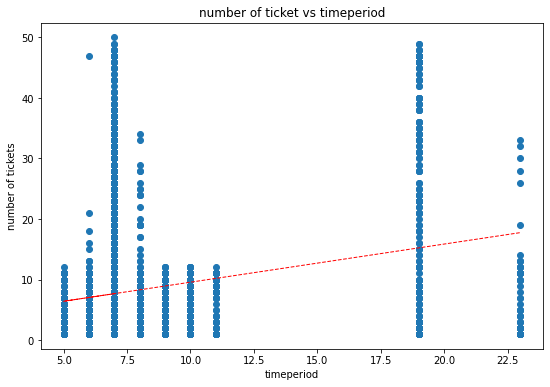

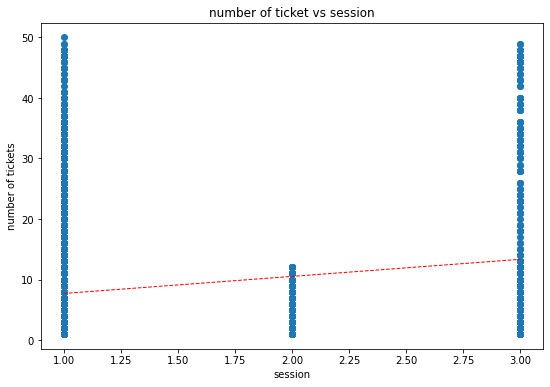

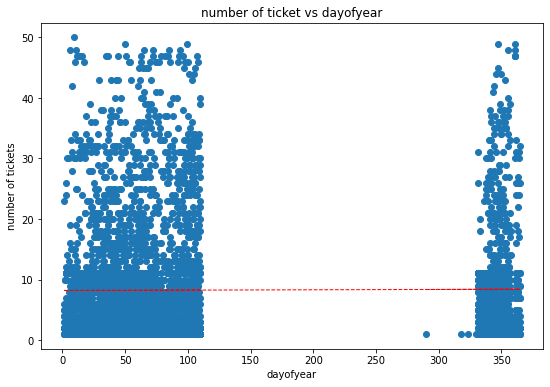

In [ ]:
for col in non_symmetric_feature[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['number_of_ticket']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('number of tickets')
    ax.set_title('number of ticket vs ' + col)
    z = np.polyfit(df[col], df['number_of_ticket'], 1)
    y_hat = np.poly1d(z)(df[col])


    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Clearly from the graphs we can say that there are no outliers in the data to be removed. As all the features are capturing valuable information removing extreme values solely due to their extremeness may reduce the performance of the prediction. So, I have not conducted outlier treatment for the data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['travel_time', 'travel_from', 'travel_date', 'weekday', 'Month']


In [ ]:
df['weekday']=df['weekday'].replace(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],[1,2,3,4,5,6,7])

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are five categorial values however the information in the features are converted into othe features as follows

weekday: The days of week days (Monday to Sunday) are replaced with using numerical data 1 to 7. 

travel_date: The information is extracted in the form of column "day of year"

travel_from: The information of the data is extracted in the form of distance because the distance from the source to destination is unique for all features. The essence of the data is fully extracted in this form due to high correlation between the features.

travel_time:Travel time is a date time feature and has a continuos valuable information. The values of hours is extracted from the data in the column "timeperiod"

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
#creating new feature waiting time

In [ ]:
city_names=list(df['travel_from'].unique())
for city in city_names:
  xdf=pd.DataFrame()
  xdf=df[df['travel_from'].str.contains(city)]
  xdf['Next bus Date'] = xdf['travel_date'].shift(-1)
  xdf['Waiting_time'] = xdf['Next bus Date'] - xdf['travel_date']
  df[city]=xdf['Waiting_time']

In [ ]:
dummies = pd.get_dummies(df[city_names])

In [ ]:
dummies

Migori   Kisii Keroka Homa Bay Keumbu Rongo Kijauri Awendo Oyugis  \
0    33 days     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6241     NaT 13 days    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
1     8 days     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
2        NaT     NaT 1 days      NaT    NaT   NaT     NaT    NaT    NaT   
5962     NaT  0 days    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
...      ...     ...    ...      ...    ...   ...     ...    ...    ...   
6222     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6223     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6225     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6215     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   
6219     NaT     NaT    NaT      NaT    NaT   NaT     NaT    NaT    NaT   

     Sirare Kehancha Nyachenge Kendu Bay Sori Rodi Mbita Ndhiwa  
0       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6241    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
1       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
2       NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
5962    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
...     ...      ...       ...       ...  ...  ...   ...    ...  
6222    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6223    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6225    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6215    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  
6219    NaT      NaT       NaT       NaT  NaT  NaT   NaT    NaT  

[6249 rows x 17 columns]

In [ ]:
df['Waiting_time']=dummies.max(axis=1)

In [ ]:
#droping the temporary columns used to create waiting time
df.drop(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu',
       'Rongo', 'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge',
       'Kehancha', 'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], axis=1, inplace=True)

In [ ]:
df["Waiting_time"] = df["Waiting_time"].apply(lambda x: x.days)

In [ ]:
df["Waiting_time"].isnull().sum()

17

In [ ]:
df["Waiting_time"].fillna(0,inplace=True)

In [ ]:
#creating new feature speed using formula speed = distance /time
df["Speed"]=df.travel_from_time/df.travel_from_distance

In [ ]:
df

ride_id travel_date travel_time  max_capacity travel_from  \
0        1442  2017-10-17        7:15            49      Migori   
6241    14304  2017-11-14        5:10            49       Kisii   
1        5437  2017-11-19        7:12            49      Migori   
2        5710  2017-11-26        7:05            49      Keroka   
5962    13477  2017-11-27       10:00            11       Kisii   
...       ...         ...         ...           ...         ...   
6222    13797  2018-04-20        7:05            49       Rongo   
6223    13798  2018-04-20        7:03            49   Nyachenge   
6225    13800  2018-04-20        7:06            49     Kijauri   
6215    13790  2018-04-20        7:13            49      Awendo   
6219    13794  2018-04-20       23:10            49        Rodi   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17        2   Oct                 370.0   
6241                 1  2017     11   14        2   Nov                 305.1   
1                    1  2017     11   19        7   Nov                 370.0   
2                    1  2017     11   26        7   Nov                 280.0   
5962                11  2017     11   27        1   Nov                 305.1   
...                ...   ...    ...  ...      ...   ...                   ...   
6222                 2  2018      4   20        5   Apr                 332.0   
6223                 2  2018      4   20        5   Apr                 326.0   
6225                 1  2018      4   20        5   Apr                 271.0   
6215                20  2018      4   20        5   Apr                 351.0   
6219                12  2018      4   20        5   Apr                 348.0   

      travel_from_time  timeperiod  session  dayofyear  Waiting_time     Speed  
0                  428           7        1        290          33.0  1.156757  
6241               334           5        1        318          13.0  1.094723  
1                  428           7        1        323           8.0  1.156757  
2                  300           7        1        330           1.0  1.071429  
5962               334          10        2        331           0.0  1.094723  
...                ...         ...      ...        ...           ...       ...  
6222               381           7        1        110           0.0  1.147590  
6223               370           7        1        110           0.0  1.134969  
6225               290           7        1        110           0.0  1.070111  
6215               398           7        1        110           0.0  1.133903  
6219               400          23        3        110           0.0  1.149425  

[6249 rows x 18 columns]

Created new features waiting time, speed.

#### 2. Feature Selection

In [ ]:
# Ride id is a unique id given to a ride it does not contain any useful information for the machine learning model. 
df.drop(['ride_id'], axis=1, inplace=True)

<AxesSubplot:>

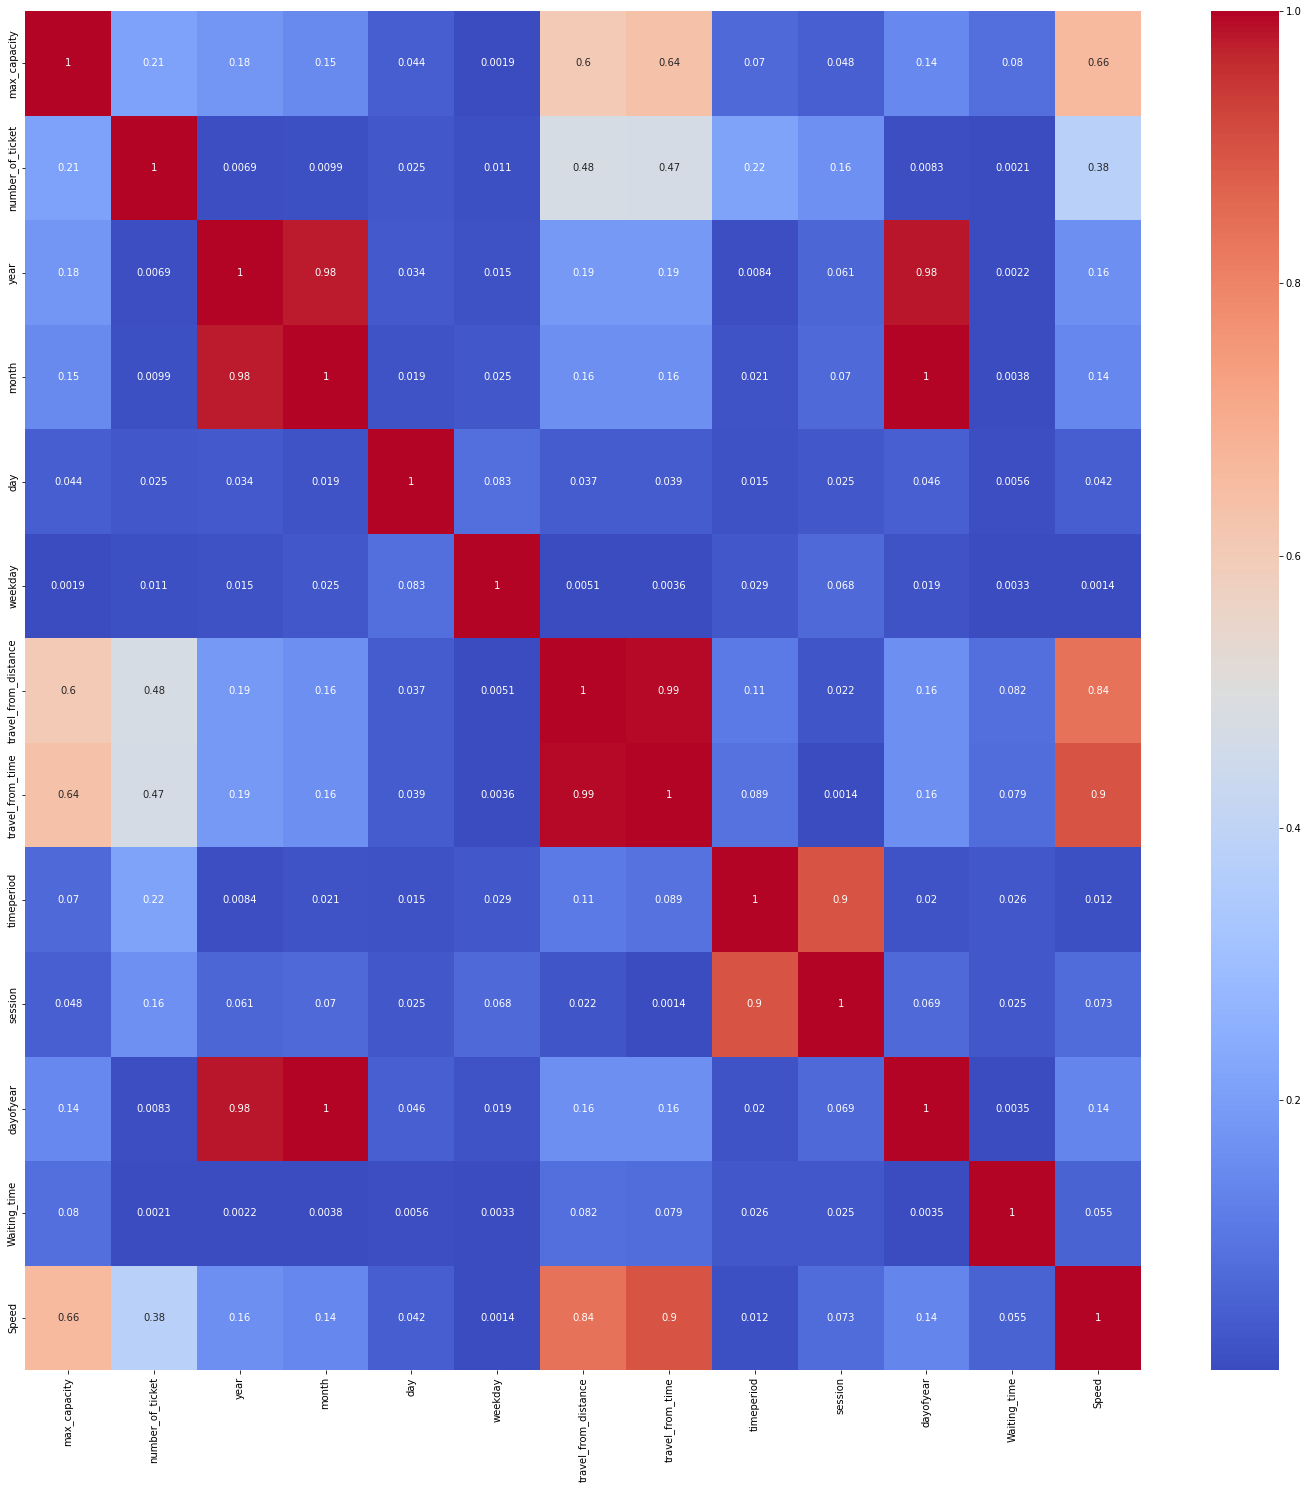

In [ ]:
## Correlation
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.drop(['year','travel_from_time','month','session'], axis=1, inplace=True)

In [ ]:
df.shape

(6249, 13)

##### What all feature selection methods have you used  and why?

I have droppeed Ride Id as the values in ride id is unique and doesnot have any useful information for the mmodel.

Also I have dropped year and month column because it is having high correlation with the feature day of year which is also a derived feature from the column travel_date.

Also the features travel_from_time and session is removed because travel_from_time is an object data type and the useful information is extracted to a new feature "time period". The feature session is created from time period for conducting statestical study so it shows high correlation with time period. So the feature session is removed.

##### Which all features you found important and why?

In [ ]:

numeric_features = df.describe().columns
numeric_features

Index(['max_capacity', 'number_of_ticket', 'day', 'weekday',
       'travel_from_distance', 'timeperiod', 'dayofyear', 'Waiting_time',
       'Speed'],
      dtype='object')

In [ ]:
corr={}
for col in numeric_features[1:]:
    feature = df[col]
    label = df['number_of_ticket']
    correlation = feature.corr(label)
    corr[col]=correlation

In [ ]:
corr

{'number_of_ticket': 1.0,
 'day': -0.02497325976684466,
 'weekday': -0.010742951435583228,
 'travel_from_distance': 0.4767382654200988,
 'timeperiod': 0.21512946223049925,
 'dayofyear': 0.008314304471951386,
 'Waiting_time': -0.0021259821169154,
 'Speed': 0.37857881183751596}

In [ ]:
corr.pop('number_of_ticket')

1.0

In [ ]:
corr

{'day': -0.02497325976684466,
 'weekday': -0.010742951435583228,
 'travel_from_distance': 0.4767382654200988,
 'timeperiod': 0.21512946223049925,
 'dayofyear': 0.008314304471951386,
 'Waiting_time': -0.0021259821169154,
 'Speed': 0.37857881183751596}

<BarContainer object of 7 artists>

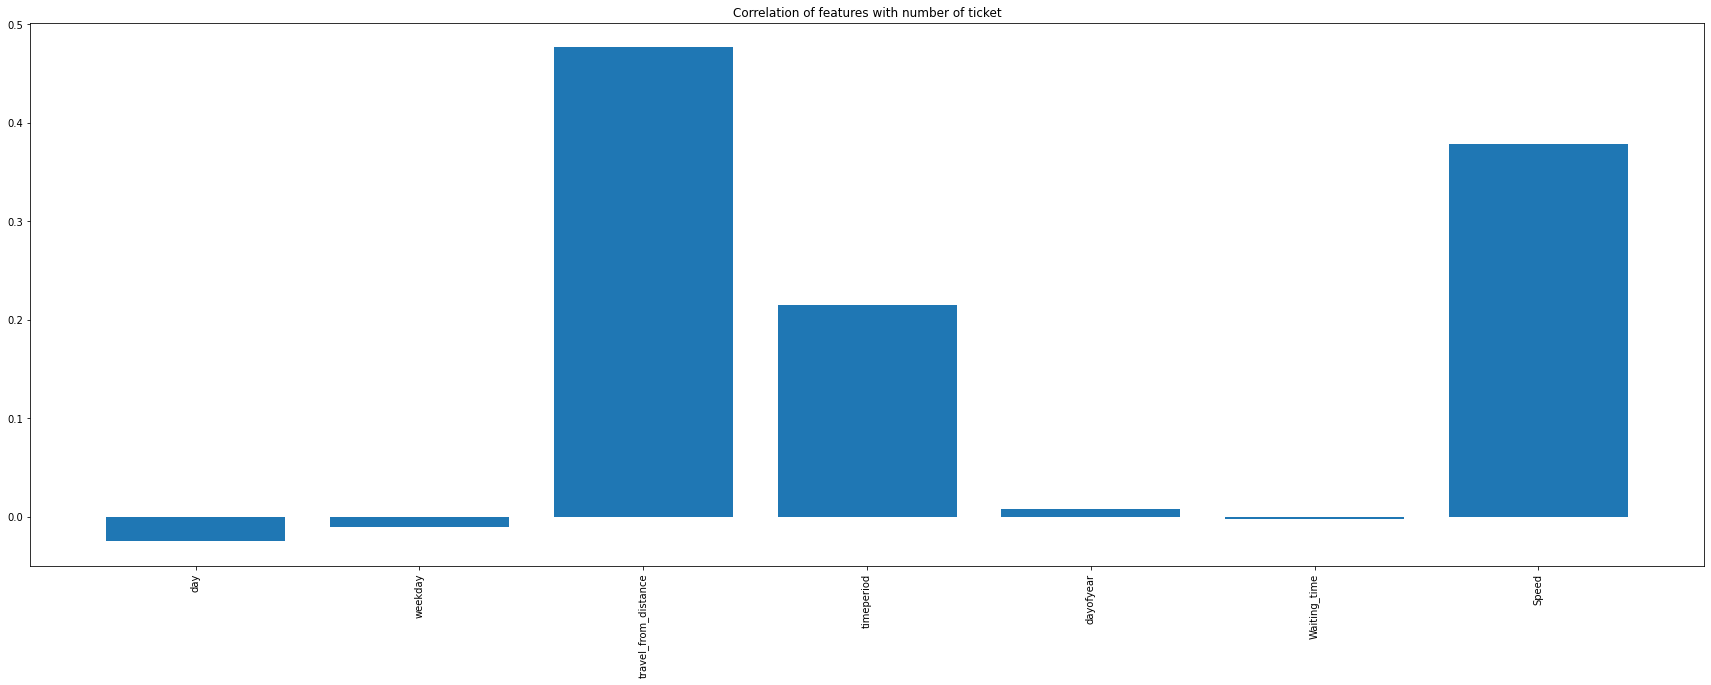

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title('Correlation of features with number of ticket')
plt.bar(corr.keys(),corr.values())

From the above correlation graph we can say that travel_from_distance, timeperiod and speed are important features in predicting the model.

### 6. Data Transformation

In [ ]:
features=list(corr.keys())

In [ ]:
data=df[features]

In [ ]:
data

day  weekday  travel_from_distance  timeperiod  dayofyear  Waiting_time  \
0      17        2                 370.0           7        290          33.0   
6241   14        2                 305.1           5        318          13.0   
1      19        7                 370.0           7        323           8.0   
2      26        7                 280.0           7        330           1.0   
5962   27        1                 305.1          10        331           0.0   
...   ...      ...                   ...         ...        ...           ...   
6222   20        5                 332.0           7        110           0.0   
6223   20        5                 326.0           7        110           0.0   
6225   20        5                 271.0           7        110           0.0   
6215   20        5                 351.0           7        110           0.0   
6219   20        5                 348.0          23        110           0.0   

         Speed  
0     1.156757  
6241  1.094723  
1     1.156757  
2     1.071429  
5962  1.094723  
...        ...  
6222  1.147590  
6223  1.134969  
6225  1.070111  
6215  1.133903  
6219  1.149425  

[6249 rows x 7 columns]

In [ ]:
def plot_data(data,feature):
  plt.figure(figsize=(10,6))    
  plt.subplot(1,2,1)
  col = data[feature]
  col.hist()
  plt.axvline(col.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(col.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(feature)
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)
  plt.show()

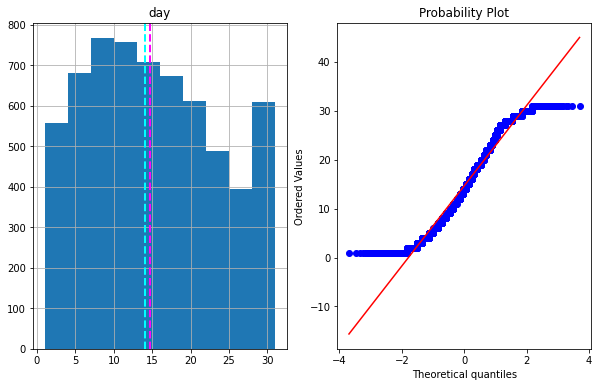

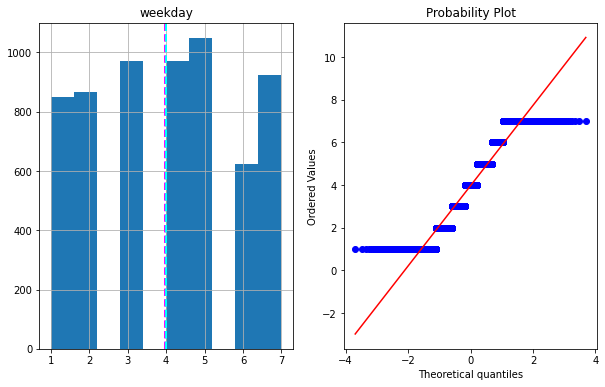

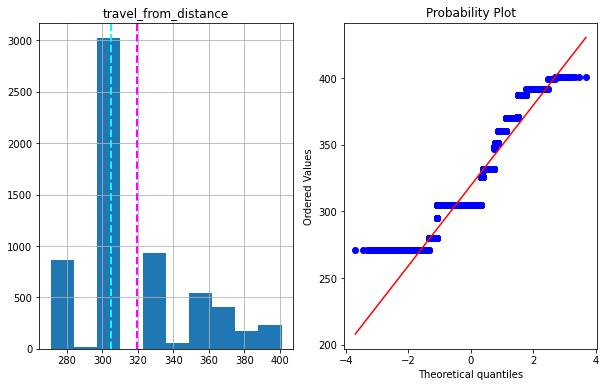

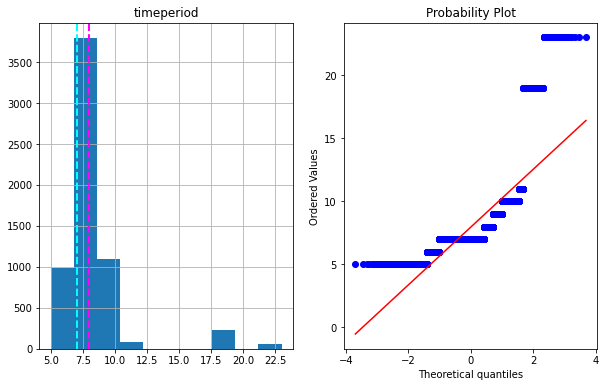

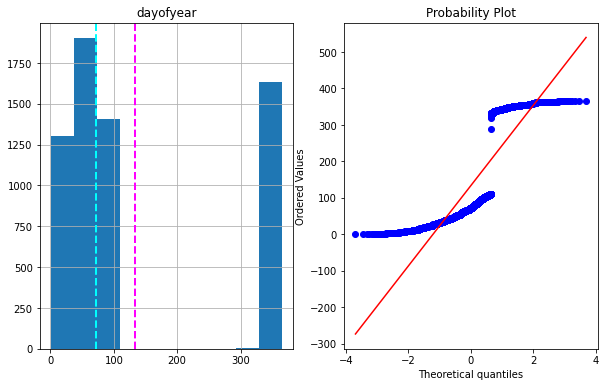

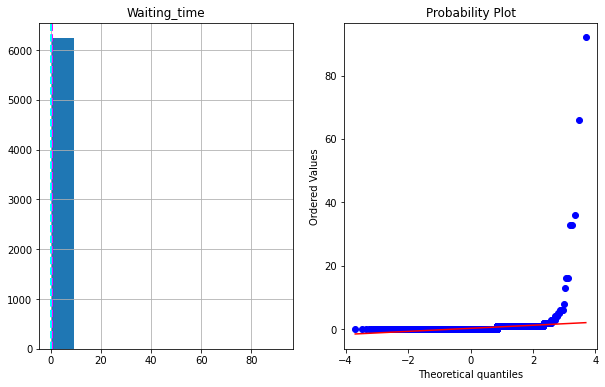

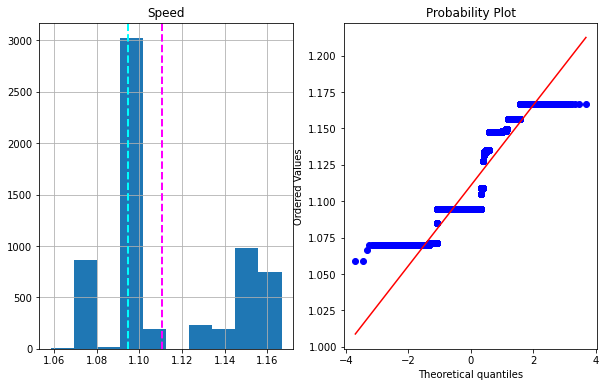

In [ ]:
for i in features:
  plot_data(data,i)
  

For all the features I have tried using log transformation,squareroot transformation,exponential transformation and reciprocal transformation but the distribution cannot be transformed into gaussian distribution. So we do not make any transformation in data.

### 7. Data Scaling

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = (df[features]).apply(zscore)


In [ ]:
Y=(df['number_of_ticket'])

##### Which method have you used to scale you data and why?

##### Which method have you used to scale you data and why?

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

generally we use Standardization when your data follows Gaussian distribution and Normalization when your data does not follow Gaussian distribution.

So, in my data the data does not follow gaussian distribution so I have used a Normalization technique (Zscore) which is a good normalizing technique when there are outliers present in tht data set. 


### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [ ]:
#creating test train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4374, 7)
(1875, 7)


##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 10. Handling Imbalanced Dataset

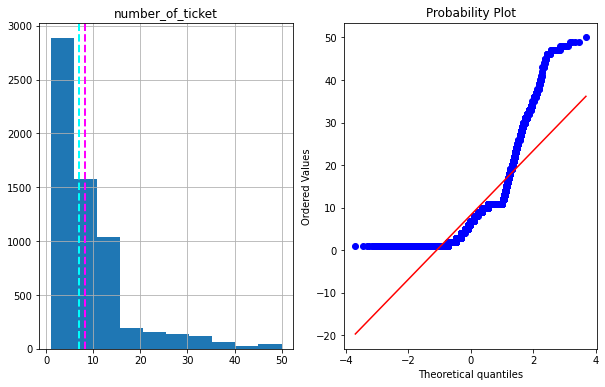

In [ ]:
plot_data(df,'number_of_ticket')

##### Do you think the dataset is imbalanced? Explain Why.

The dependent variable does not follow gaussian distribution. Which means there is imbalance in dataset.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 In regression problem there is no need to normalize the dependent variable if the model is estimated properly. So, I have made no changes to the dependent variable.

## ***7. ML Model Implementation***

In [ ]:
#creating dictionaries of the regression metrics
MSE_train={}
MSE_test={}
RMSE_train={}
RMSE_test={}
R2_train={}
R2_test={}


### ML Model - 1 - **Implementing Linear Regression**

In [ ]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.25260716522311155

In [ ]:
reg.score(X_test, y_test)

0.28762319547682735

In [ ]:
reg.coef_

array([-0.30373532, -0.16115423,  4.18905854,  1.4879073 ,  0.74578187,
       -0.26669956, -0.25768591])

In [ ]:
list(zip(corr.keys(),reg.coef_))

[('day', -0.30373531733969145),
 ('weekday', -0.1611542292749526),
 ('travel_from_distance', 4.189058544976175),
 ('timeperiod', 1.4879072993675189),
 ('dayofyear', 0.7457818713014076),
 ('Waiting_time', -0.2666995556552713),
 ('Speed', -0.2576859100708132)]

In [ ]:
len(reg.coef_)

7

In [ ]:
reg.intercept_

8.197799789513125

In [ ]:
y_pred_train=reg.predict(X_train)

In [ ]:


y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([13.87848121, 25.48469012,  1.29796757, ...,  7.20216661,
       12.23989774,  7.47867344])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
MSE =mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
MSE_train['Linear regression']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Linear regression']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)
R2_train['Linear regression']=r2


MSE : 55.56710380056011
RMSE : 7.454334564571147
R2 : 0.25260716522311155


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
MSE_test['Linear regression']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Linear regression']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred))
print("R2 :" ,r2)
R2_test['Linear regression']=r2


MSE : 55.56710380056011
RMSE : 7.454334564571147
R2 : 0.28762319547682735


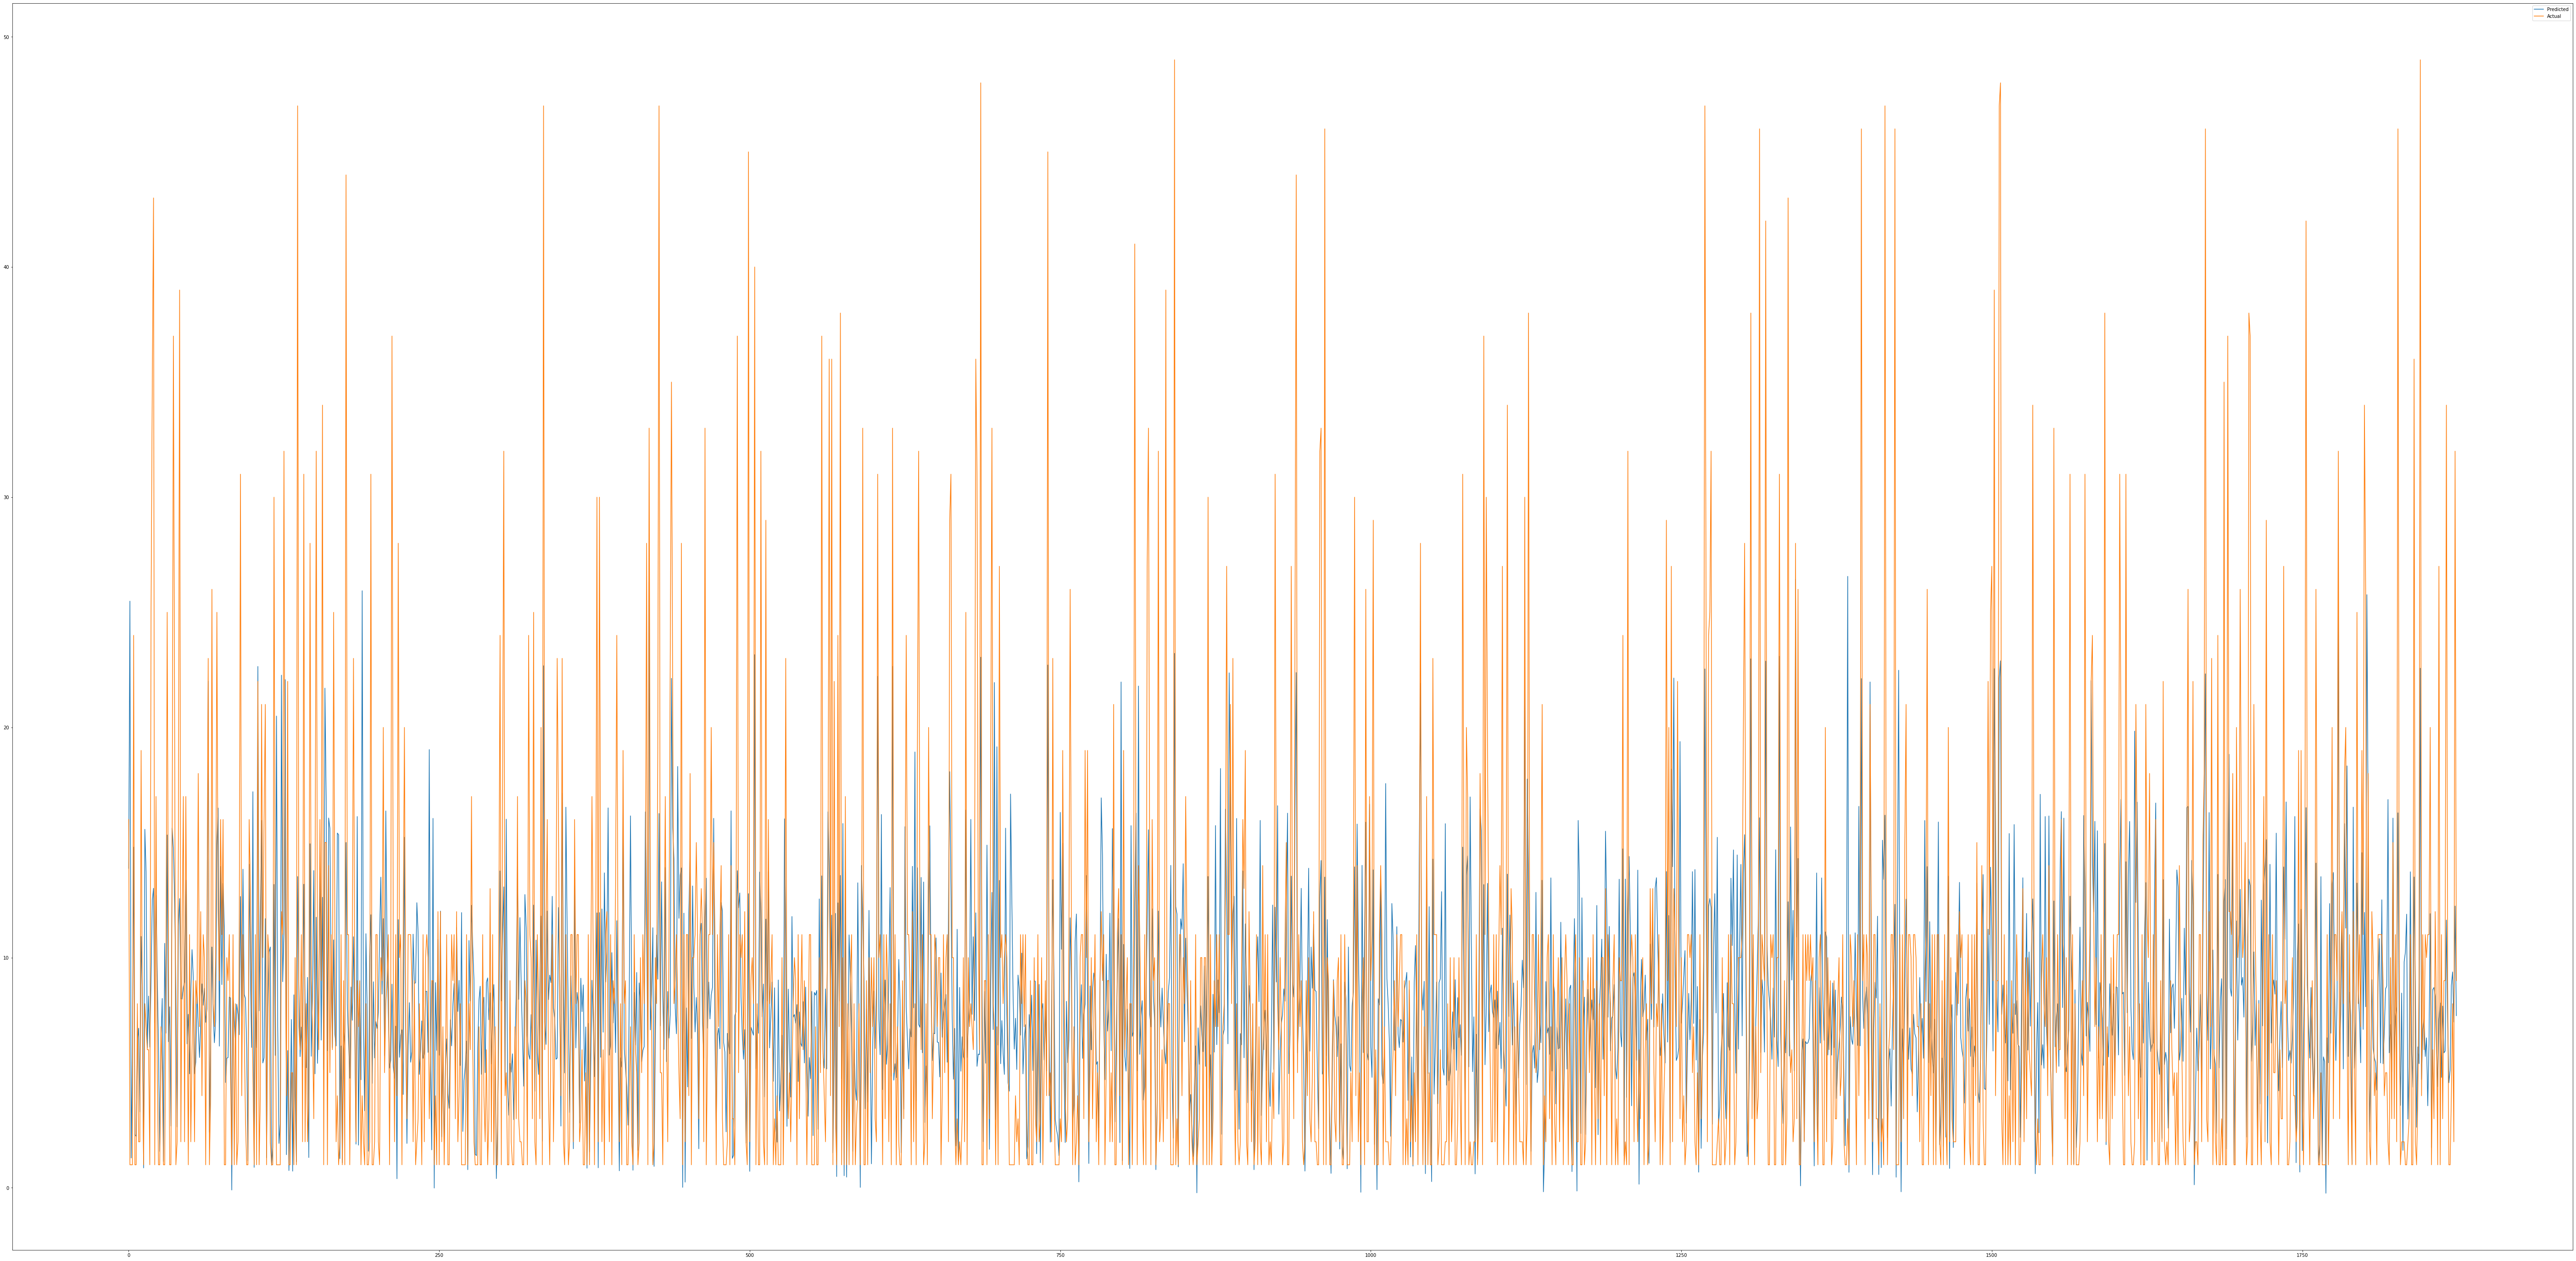

In [ ]:
#plotting predicted vs acual graph
plt.figure(figsize=(100,50))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

I used Linear regression algorithm to create the model. As I got not so good result. 

For training dataset, i found that the R2 score is 25.26% and for the test dataset,I found that R2 score is 28.76%. From the above R2 scores we can say that the model is highly biased and has low variance.

High bias in the model indicates that the the model is not able to understand the relation between predicted and actual. This can be visualized from the graph between predicted and actual.

The linear regression based algorithms are often used to reduce overfitting problem but our data is underfitting so we will use other algorithms.



### ML Model - 2 - **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 500)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=500)

In [ ]:
lasso.score(X_train, y_train)

0.2514356895278669

In [ ]:
lasso.score(X_test,y_test)

0.2857561681458396

In [ ]:
lasso.coef_

array([-0.18928558, -0.05081957,  3.8439494 ,  1.41987218,  0.62173593,
       -0.17466894, -0.        ])

In [ ]:
list(zip(corr.keys(),lasso.coef_))

[('day', -0.18928557755373612),
 ('weekday', -0.050819567049413816),
 ('travel_from_distance', 3.8439493971353054),
 ('timeperiod', 1.4198721841167983),
 ('dayofyear', 0.6217359274329999),
 ('Waiting_time', -0.17466894356140483),
 ('Speed', -0.0)]

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.852386251220665


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso= lasso_regressor.predict(X_train)

<AxesSubplot:ylabel='Density'>

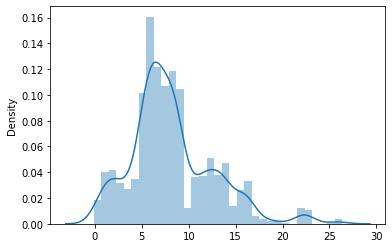

In [ ]:
sns.distplot(y_pred_lasso)

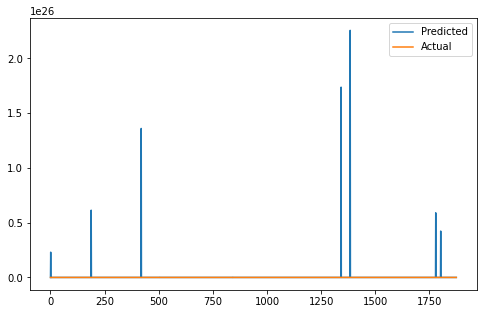

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :" , MSE)
MSE_train['Lasso']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Lasso']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_lasso))
print("R2 :" ,r2)
R2_train['Lasso']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 54.56671278017583
RMSE : 7.386928507856011
R2 : 0.2525836900350402
Adjusted R2 : 0.2513853588005568


In [ ]:

MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)
MSE_test['Lasso']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Lasso']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
R2_test['Lasso']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 55.57304598395482
RMSE : 7.454733126273188
R2 : 0.28754701598700183
Adjusted R2 : 0.28487579430082555


I used Lasso regression algorithm to create the model. As I got not so good result. 

For training dataset, i found that the R2 score is 25.13% and for the test dataset,I found that R2 score is 28.75%. From the above R2 scores we can say that the model is highly biased and has low variance.

High bias in the model indicates that the the model is not able to understand the relation between predicted and actual. This can be visualized from the graph between predicted and actual.

The lasso regression is a linear regression based algorithm and it is often used to reduce overfitting problem but our data is underfitting so we will use other algorithms.


### ML Model - 3 - **Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 40}

Using  {'alpha': 40}  the negative mean squared error is:  -54.902972571263696


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :" , MSE)
MSE_train['Ridge']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Ridge']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_ridge))
print("R2 :" ,r2)
R2_train['Ridge']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 54.57010289044684
RMSE : 7.387157971131174
R2 : 0.2525372546978166
Adjusted R2 : 0.25133884901364


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)
MSE_test['Ridge']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Ridge']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
R2_test['Ridge']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 55.592083926759685
RMSE : 7.456009919974603
R2 : 0.2873029473216868
Adjusted R2 : 0.28463081054142525


<AxesSubplot:ylabel='Density'>

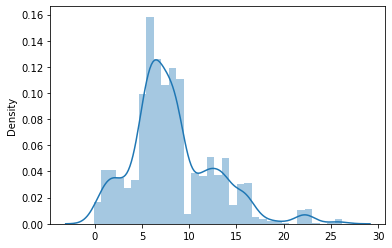

In [ ]:
sns.distplot(y_pred_ridge)

I used Ridge regression algorithm to create the model. As I got not so good result. 

For training dataset, i found that the R2 score is 25.25% and for the test dataset,I found that R2 score is 28.73%. From the above R2 scores we can say that the model is highly biased and has low variance.

High bias in the model indicates that the the model is not able to understand the relation between predicted and actual. This can be visualized from the graph between predicted and actual.

The Ridge regression is a linear regression based algorithm and it is often used to reduce overfitting problem but our data is underfitting so we will use other algorithms.


### ML Model - 4.1 - **Implementing Elasticnet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.2506181551975286

In [ ]:
y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train),(y_pred_train_en))
print("MSE :" , MSE)
MSE_train['Elasticnet']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Elasticnet']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_en))
print("R2 :" ,r2)
R2_train['Elasticnet']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_en)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 54.71021081936493
RMSE : 7.396635101136525
R2 : 0.2506181551975286
Adjusted R2 : 0.2494166726245517


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)
MSE_test['Elasticnet']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Elasticnet']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
R2_test['Elasticnet']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 55.85176527587326
RMSE : 7.473403861419056
R2 : 0.28397380189168997
Adjusted R2 : 0.2812891830450064


I used Elastic regression algorithm to create the model which is a hybrid of Lasso and Ridge. As I got not so good result. 

For training dataset, i found that the R2 score is 25.06% and for the test dataset,I found that R2 score is 28.39%. From the above R2 scores we can say that the model is highly biased and has low variance.

High bias in the model indicates that the the model is not able to understand the relation between predicted and actual. This can be visualized from the graph between predicted and actual.

The ElasticNet regression is a linear regression based algorithm and it is often used to reduce overfitting problem but our data is underfitting so we will use other algorithms. So improve the R2 score I have used cross validation with hyper parameter tuning


### ML Model - 4.2 - **Implementing Elasticnet Regression with Cross Validation & Hyper parameter Tuning**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.3}

Using  {'alpha': 0.01, 'l1_ratio': 0.3}  the negative mean squared error is:  -54.85114758948661


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred__train_elastic = elastic_regressor.predict(X_train)

<AxesSubplot:ylabel='Density'>

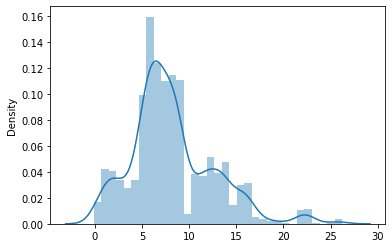

In [ ]:
sns.distplot(y_pred_elastic)

In [ ]:
MSE  = mean_squared_error((y_train), (y_pred__train_elastic))
print("MSE :" , MSE)
MSE_train['Elasticnet cv']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Elasticnet cv']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred__train_elastic))
print("R2 :" ,r2)
R2_train['Elasticnet cv']=r2
Adjusted_R2=1-(1-r2_score((y_train), (y_pred__train_elastic)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 54.56938181238444
RMSE : 7.387109164780526
R2 : 0.252547131516066
Adjusted R2 : 0.2513487416673744


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)
MSE_test['Elasticnet cv']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Elasticnet cv']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
R2_test['Elasticnet cv']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 55.5880165532557
RMSE : 7.455737156931948
R2 : 0.28735509152826577
Adjusted R2 : 0.28468315025386715


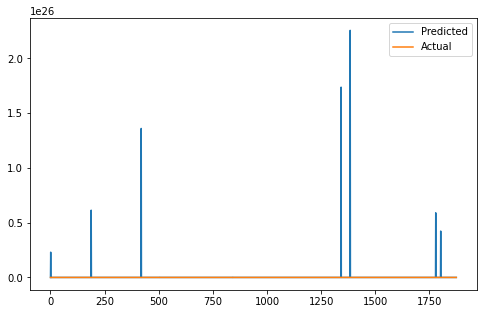

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found that the R2 score is 25.25% and for the test dataset,I found that R2 score is 28.73%. From the above R2 scores we can say that the model is highly biased and has low variance.

There is a minimal improvement in the R2 scores after cross validation and hyper parameter tuning. Because the Linear regression based algorithms perform better on datasets having more rows and columns. So, to improve the R2 scores we can use decission tree based algorithms.


### ML Model - 5 - **Decission Tree Regression**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dtree = DecisionTreeRegressor(random_state = 30) 
  
# fit the regressor with X and Y data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [ ]:
print("Train data Reg Score :",dtree.score(X_train,y_train))
print("Test data Reg Score :",dtree.score(X_test,y_test))

Train data Reg Score : 0.8273039193614662
Test data Reg Score : 0.1751037703848295


In [ ]:
# Predicting the values for test data
y_pred_dtree = dtree.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train), (y_pred_dtree))
print("MSE :" , MSE)
MSE_train['Decission Tree']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Decission Tree']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_dtree))
print("R2 :" ,r2)
R2_train['Decission Tree']=r2

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_dtree)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 12.60804360946679
RMSE : 3.5507807042208044
R2 : 0.8273039193614662
Adjusted R2 : 0.8270270360439056


In [ ]:
# Predicting the values for test data
y_pred_dtree = dtree.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_dtree))
print("MSE :" , MSE)
MSE_test['Decission Tree']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Decission Tree']=RMSE

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_dtree))
print("R2 :" ,r2)
R2_test['Decission Tree']=r2

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_dtree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 64.34388953244735
RMSE : 8.021464301014332
R2 : 0.1751037703848295
Adjusted R2 : 0.17201096181101783


In [ ]:
# Extracting the importances by sklearn 
importances_sk = dtree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'day': 0.085, 'weekday': 0.067, 'travel_from_distance': 0.067, 'timeperiod': 0.109, 'dayofyear': 0.234, 'Waiting_time': 0.032, 'Speed': 0.406}


<BarContainer object of 7 artists>

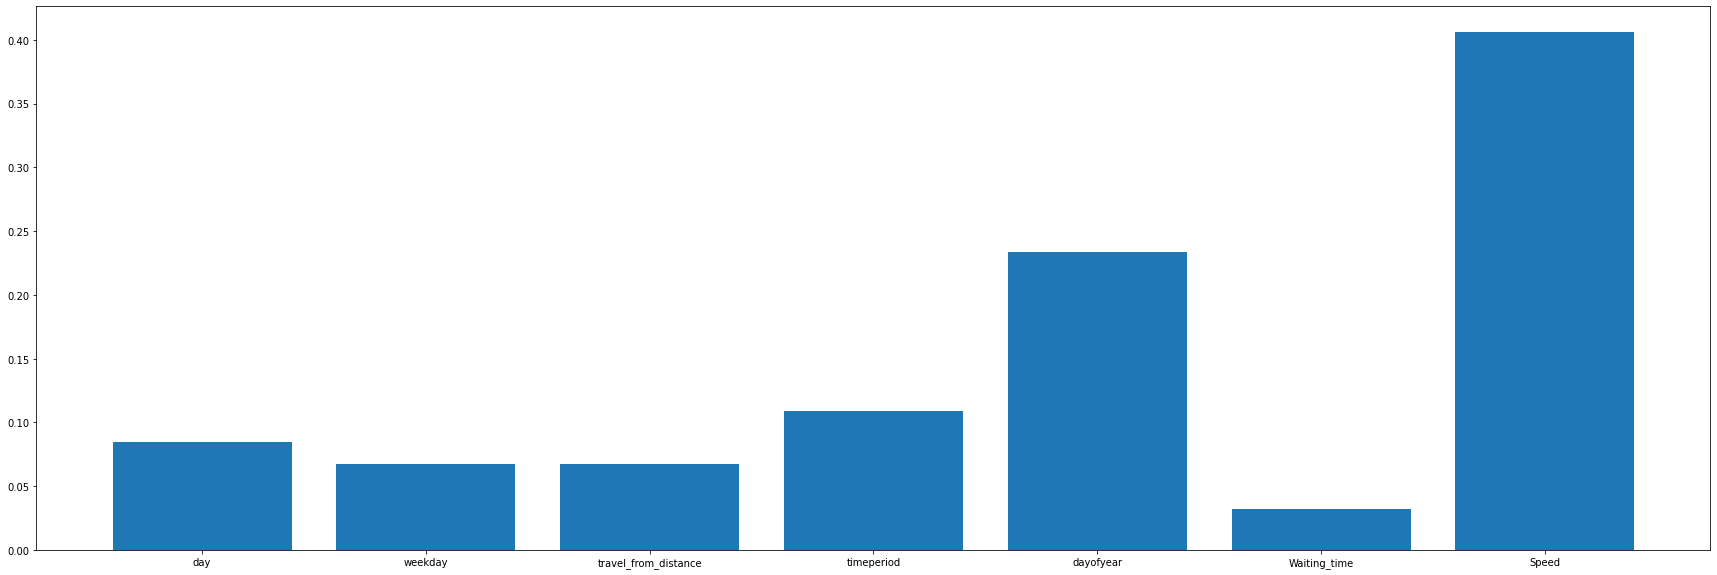

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(feature_importance_sk.keys(),feature_importance_sk.values())

I have used Decission Tree regression algorithm to create the model. As I got not so good result on test set. 

For training dataset, i found that the R2 score is 82.73% and for the test dataset,I found that R2 score is 17.20%. From the above R2 scores we can say that the model is low biased and has high variance.

High variance in the model indicates that the the model is has high variability in prediction if another data set is used for training.

The Decission tree regressior is a good learning algorithm which learns every data point in the data set including noise which makes it overfitting. In order to reduce overfitting problem we use boosting algorithms like Gradient Boosting and Extreme Gradient Boosting algorithms or use bagging algorithms like Random Forest.


### ML Model - 6.1 - **Gradient Boosing Regression**

In [ ]:

# Importing the GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Training the simple gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state= 30)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=30)

In [ ]:

# Predicting the values for training data
y_train_gb_reg = gb_reg.predict(X_train)


In [ ]:
# Sample of predicted values of training data
y_train_gb_reg[:10]

array([8.17923265, 6.53429391, 7.86746863, 8.65001763, 8.13415719,
       5.35376363, 6.5496444 , 8.13415719, 2.54260154, 9.40628374])

In [ ]:
# Actual values of training data
y_train[:10]

1811     4
245      1
2628    11
3639    12
1456    10
3766    10
795      1
1470     9
4135     1
4259    11
Name: number_of_ticket, dtype: int64

In [ ]:


# Predicting the values for test data
y_test_gb_reg = gb_reg.predict(X_test)
y_train_gb_reg = gb_reg.predict(X_train)

In [ ]:

# Sample of predicted values of test data
y_test_gb_reg[:10]

array([16.38288888,  7.3427088 ,  2.54961564,  3.50012848, 24.17075268,
        2.96149726,  2.98368475,  8.49435354,  4.58822103,  3.42322058])

In [ ]:

# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [ ]:


print("Train data Reg Score :",gb_reg.score(X_train,y_train))
print("Test data Reg Score :",gb_reg.score(X_test,y_test))

Train data Reg Score : 0.5185731804988993
Test data Reg Score : 0.4793704304804215


In [ ]:
MSE  = mean_squared_error((y_train), (y_train_gb_reg))
print("MSE :" , MSE)
MSE_train['Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_gb_reg))
print("R2 :" ,r2)
R2_train['Gradient Boosting Regressor']=r2

MSE : 35.147585935904566
RMSE : 5.92853994976036
R2 : 0.5185731804988993


In [ ]:

MSE  = mean_squared_error((y_test), (y_test_gb_reg))
print("MSE :" , MSE)
MSE_test['Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_gb_reg))
print("R2 :" ,r2)
R2_test['Gradient Boosting Regressor']=r2

MSE : 40.61035837698208
RMSE : 6.372625705074956
R2 : 0.4793704304804215


I have used Gradient Boosting regression algorithm to create the model. I have got a good result in terms of bias and variance after applying this regressor. 

For training dataset, i found that the R2 score is 51.85% and for the test dataset,I found that R2 score is 47.93%. From the above R2 scores we can say that the model is moderately biased and has low variance.

The model performed well using gradient boosting algorithm. However the bias can be reduced by using cross validation and hyper parameter tuning.

### ML Model - 6.2 - **Gradient Boosing Regression with Cross Validation and Hyper Parameter Tuning**

In [ ]:
gbr = GradientBoostingRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from scipy.stats import randint
rs_space={'max_depth':list(np.arange(2,20,step=2)),'learning_rate':[0.01,0.05,0.1,1,5],'n_estimators':np.arange(10,100,step=10),'subsample':np.arange(0.1,1,step=0.1)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
gbr_random=RandomizedSearchCV(gbr,rs_space,n_iter=250,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,random_state=2)
model_random=gbr_random.fit(X_train, y_train)

In [ ]:
# Viewing the best model parameters
gbr_random.best_params_
     

{'subsample': 0.8, 'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.05}

In [ ]:
gbr_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=70,
                          subsample=0.8)

In [ ]:
gbr_optimal_model =gbr_random.best_estimator_
y_train_pred_gbr_RandomCV = gbr_optimal_model.predict(X_train)

In [ ]:
# Evaluation metrics for training data
MSE_train_gbr_best_RandomCV  = mean_squared_error(y_train, y_train_pred_gbr_RandomCV)
print("MSE for Train data :" , MSE_train_gbr_best_RandomCV)
MSE_train['Gradient Boosting Regressor cv']=MSE
RMSE_train_gbr_best_RandomCV = np.sqrt(MSE_train_gbr_best_RandomCV)
print("RMSE for Train data:" ,RMSE_train_gbr_best_RandomCV)
RMSE_train['Gradient Boosting Regressor cv']=RMSE
r2_score_train_gbr_RandomCV = r2_score(y_train, y_train_pred_gbr_RandomCV)
R2_train['Gradient Boosting Regressor cv']=r2
print("R2 for Train data:" ,r2_score_train_gbr_RandomCV)

MSE for Train data : 34.96711296008084
RMSE for Train data: 5.913299667705066
R2 for Train data: 0.5210451719157541


In [ ]:

# Predicting the target values of test data using calculated best model
y_test_pred_gbr_RandomCV = gbr_optimal_model.predict(X_test)

In [ ]:
# Evaluation metrics for test data
MSE_test_gbr_best_RandomCV  = mean_squared_error(y_test, y_test_pred_gbr_RandomCV)
print("MSE for Test data :" , MSE_test_gbr_best_RandomCV)
MSE_test['Gradient Boosting Regressor cv']=MSE
RMSE_test_gbr_best_RandomCV = np.sqrt(MSE_test_gbr_best_RandomCV)
print("RMSE for Test data:" ,RMSE_test_gbr_best_RandomCV)
RMSE_test['Gradient Boosting Regressor cv']=RMSE
r2_score_test_gbr_best_RandomCV = r2_score(y_test, y_test_pred_gbr_RandomCV)
R2_test['Gradient Boosting Regressor cv']=r2
print("R2 for Test data:" ,r2_score_test_gbr_best_RandomCV)

MSE for Test data : 40.030513965666664
RMSE for Test data: 6.326967201247898
R2 for Test data: 0.48680410401388585


##### Which hyperparameter optimization technique have you used and why?

RandomSearchCV which uses the random Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Random Search uses some random combination of the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-less consuming and less expensive based on the number of hyperparameters involved.

In RandomSearchCV, along with Random Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used RandomsearhCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Randomsearch with cross validation For training dataset, i found that the R2 score has increased from 51.85% to 53.19% (i.e approximately 2 percent increase in training data) and for the test dataset,I found that R2 score has increased from 47.93% to 48.52% (i.e, approximately 1 percent increase in test data). From the above R2 scores we can say that the model is moderately biased and has low variance.

The model performed well using gradient boosting algorithm with Cross validation and Hyper parameter tuning but we can try other algorithms to obtain better scores.

### ML Model - 7.1 - ** Extreme Gradient Boosing Regression**

In [ ]:

# Importing Extreme Gradient Boosting
import xgboost as xgb

In [ ]:
#Training basic XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predicting the values for training data
y_train_xgb_reg = xgb_reg.predict(X_train)

In [ ]:

# Sample of predicted values for tarining data
y_train_xgb_reg[:10]

array([ 7.616286 ,  2.3590646,  9.497068 ,  7.6406174,  8.349387 ,
        5.3280144,  6.9506183,  8.349387 ,  1.9051783, 10.005859 ],
      dtype=float32)

In [ ]:

# Actual values of training data
y_train[:10]

1811     4
245      1
2628    11
3639    12
1456    10
3766    10
795      1
1470     9
4135     1
4259    11
Name: number_of_ticket, dtype: int64

In [ ]:

# Predicting the values for test data
y_test_xgb_reg = xgb_reg.predict(X_test)

In [ ]:
# Sample of predicted values for test data
y_test_xgb_reg[:10]

array([13.498651 ,  3.3791869,  2.5500138,  3.3524778, 20.932837 ,
        3.7136197,  2.3406408, 10.385539 ,  1.4053644,  2.2564604],
      dtype=float32)

In [ ]:
# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [ ]:
print("Train data Reg Score :",xgb_reg.score(X_train,y_train))
print("Test data Reg Score :",xgb_reg.score(X_test,y_test))

Train data Reg Score : 0.7472988742164614
Test data Reg Score : 0.4045838645254781


In [ ]:
# Evaluation metrics for training data
MSE_train_xgb_reg  = mean_squared_error(y_train, y_train_xgb_reg)
print("MSE for Train data :" , MSE_train_xgb_reg)
MSE_train['Extreme Gradient Boosting Regressor']=MSE
RMSE_train_xgb_reg = np.sqrt(MSE_train_xgb_reg)
print("RMSE for Train data:" ,RMSE_train_xgb_reg)
RMSE_train['Extreme Gradient Boosting Regressor']=RMSE
r2_score_train_xgb_reg = r2_score(y_train, y_train_xgb_reg)
print("R2 for Train data:" ,r2_score_train_xgb_reg)
R2_train['Extreme Gradient Boosting Regressor']=r2

MSE for Train data : 18.448981599697625
RMSE for Train data: 4.295227770409577
R2 for Train data: 0.7472988742164614


In [ ]:
MSE  = mean_squared_error((y_test), (y_test_xgb_reg))
print("MSE :" , MSE)
MSE_test['Extreme Gradient Boosting Regressor']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Extreme Gradient Boosting Regressor']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_xgb_reg))
print("R2 :" ,r2)
R2_test['Extreme Gradient Boosting Regressor']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_test_xgb_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 46.44389036022423
RMSE : 6.814975448248088
R2 : 0.4045838645254781
Adjusted R2 : 0.4023514526624241


I have used Extreme Gradient Boosting regression algorithm to create the model. I have got a good result in terms of bias and variance after applying this regressor. 

For training dataset, i found that the R2 score is 51.27% and for the test dataset,I found that R2 score is 47.96%. From the above R2 scores we can say that the model is moderately biased and has low variance.

The model performed well using Extreme gradient boosting algorithm. However the bias can be reduced by using cross validation and hyper parameter tuning.

### ML Model - 7.2 - **Extreme Gradient Boosing Regression with Cross Validation and Hyper Parameter Tuning**

In [ ]:
xgbr = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Fraction of columns to be randomly samples for each tree
colsample_bytree= [0.3,0.6,0.9]
eta = [0.0001, 0.001]

# Magnitude of this change in the estimates
learning_rate=  [0.05, 0.1]

# Maximum number of levels in tree
max_depth= [3,6]
min_child_weight= [7, 12]

# Number of trees in random forest
n_estimators= [70, 100]

#Fraction of observations to be selected for each tree
subsample= [0.5, 0.7, 1]

# Create the random grid
xgb_grid_params_dict = {'colsample_bytree': colsample_bytree,
         'eta': eta,
         'learning_rate': learning_rate,
         'max_depth': max_depth,
         'min_child_weight': min_child_weight,
         'n_estimators': n_estimators,
         'subsample': subsample}
pprint(xgb_grid_params_dict)

{'colsample_bytree': [0.3, 0.6, 0.9],
 'eta': [0.0001, 0.001],
 'learning_rate': [0.05, 0.1],
 'max_depth': [3, 6],
 'min_child_weight': [7, 12],
 'n_estimators': [70, 100],
 'subsample': [0.5, 0.7, 1]}


In [ ]:

# First create the base model to tune
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = 1)

# Fit the Grid Search model
xgbr_grid.fit(X_train, y_train)
     

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=70, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.3, eta=0.0001, learning_rat

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=3

In [ ]:
# Viewing the best paramters for the optimal model
xgbr_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.0001,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 12,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
xgbr_grid.best_estimator_


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eta=0.0001, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=12, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:

# Testing the optimal model with training data
xgbr_optimal_model =xgbr_grid.best_estimator_
y_train_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_train)

In [ ]:
#Evaluation metrics of the model for training data
MSE_train_xgbr_best_gridCV  = mean_squared_error(y_train, y_train_pred_xgbr_gridCV)
print("MSE for Train data :" , MSE_train_xgbr_best_gridCV)
MSE_train['Extreme Gradient Boosting Regressor CV']=MSE_train_xgbr_best_gridCV
RMSE_train_xgbr_best_gridCV = np.sqrt(MSE_train_xgbr_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_xgbr_best_gridCV)
RMSE_train['Extreme Gradient Boosting Regressor CV']=RMSE_train_xgbr_best_gridCV

r2_score_train_xgbr_gridCV = r2_score(y_train, y_train_pred_xgbr_gridCV)
print("R2 for Train data:" ,r2_score_train_xgbr_gridCV)
R2_train['Extreme Gradient Boosting Regressor CV']=r2_score_train_xgbr_gridCV


MSE for Train data : 32.155462134377096
RMSE for Train data: 5.67057864193568
R2 for Train data: 0.5595571800244941


In [ ]:

# Testing the optimal model with training data
y_test_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_test)
     

In [ ]:
#Evaluation metrics of the model for test data
MSE_test_xgbr_best_gridCV  = mean_squared_error(y_test, y_test_pred_xgbr_gridCV)
print("MSE for Test data :" , MSE_test_xgbr_best_gridCV)
MSE_test['Extreme Gradient Boosting Regressor CV']=MSE_test_xgbr_best_gridCV
RMSE_test_xgbr_best_gridCV = np.sqrt(MSE_test_xgbr_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_xgbr_best_gridCV)
RMSE_test['Extreme Gradient Boosting Regressor CV']=RMSE_test_xgbr_best_gridCV

r2_score_test_xgbr_best_gridCV = r2_score(y_test, y_test_pred_xgbr_gridCV)
print("R2 for Test data:" ,r2_score_test_xgbr_best_gridCV)
R2_test['Extreme Gradient Boosting Regressor CV']=r2_score_test_xgbr_best_gridCV


MSE for Test data : 40.556497516141896
RMSE for Test data: 6.368398347790588
R2 for Test data: 0.4800609330495659


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Gridsearch with cross validation For training dataset, i found that the R2 score has increased from 51.27% to 56.61% (i.e approximately 5 percent increase in training data)and for the test dataset,I found that R2 score is 47.96% to 50.62% (i.e, approximately 3 percent increase in test data). From the above R2 scores we can say that the model is moderately biased and has low variance.

The model performed well using Extreme gradient boosting algorithm with Cross validation and Hyper parameter tuning but we can try bagging algorithms to obtain better scores.

### ML Model - 8.1 - ** Random Forest Regression**

In [ ]:

# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Training the simple gradient Boosting model
randf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=30)
randf_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=30)

In [ ]:

# Predicting the values for tarining data
y_train_rf_reg = randf_reg.predict(X_train)

In [ ]:

# Sample of predicted values of training data
y_train_rf_reg[:10]

array([8.32823781, 8.32823781, 8.32823781, 8.32823781, 8.32823781,
       4.77789966, 4.77789966, 8.32823781, 2.38724454, 8.32823781])

In [ ]:
# Actual values of test data
y_test[:10]

2730    16
6041     1
3257     1
5073     1
1657    24
2140     1
1285     1
3071     8
2526     2
634      2
Name: number_of_ticket, dtype: int64

In [ ]:

# Predicting the values for test data
y_test_rf_reg = randf_reg.predict(X_test)

In [ ]:

# Sample of predicted values of test data
y_test_rf_reg[:10]

array([16.59174021,  8.98014837,  2.38724454,  3.28691715, 20.89282296,
        2.38724454,  2.38724454,  8.32823781,  4.77789966,  2.38724454])

In [ ]:

print("Train data Reg Score :",randf_reg.score(X_train,y_train))
print("Test data Reg Score :",randf_reg.score(X_test,y_test))

Train data Reg Score : 0.45375094492985657
Test data Reg Score : 0.45026362365132544


In [ ]:
MSE  = mean_squared_error((y_train), (y_train_rf_reg))
print("MSE :" , MSE)
MSE_train['Random Forest']=MSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_train['Random Forest']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_rf_reg))
print("R2 :" ,r2)
R2_train['Random Forest']=r2

Adjusted_R2=1-(1-r2_score((y_train), (y_train_rf_reg)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 39.88007071434174
RMSE : 6.315066960400479
R2 : 0.45375094492985657
Adjusted R2 : 0.4528751447957542


In [ ]:
MSE  = mean_squared_error((y_test), (y_test_rf_reg))
print("MSE :" , MSE)
MSE_test['Random Forest']=MSE

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
RMSE_test['Random Forest']=RMSE
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_rf_reg))
print("R2 :" ,r2)
R2_test['Random Forest']=r2
Adjusted_R2=1-(1-r2_score((y_test), (y_test_rf_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 42.88075930259591
RMSE : 6.548340194476453
R2 : 0.45026362365132544
Adjusted R2 : 0.44820248030133036


I have used Random Forest regression algorithm to create the model. I have got a good result in terms of bias and variance after applying this regressor. 

For training dataset, i found that the R2 score is 45.37% and for the test dataset,I found that R2 score is 45.02%. From the above R2 scores we can say that the model is moderately biased and has low variance.

The model performed well using Random Forest Regressor algorithm. However the bias can be reduced by using cross validation and hyper parameter tuning.

### ML Model - 8.2 - **Random Forest Regression with Cross Validation and Hyper Parameter Tuning**

In [ ]:
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Importing the GridSearch Cross Valiation Packages
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 800, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 2)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_params_dict)

{'bootstrap': [True, False],
 'max_depth': [40, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 12],
 'n_estimators': [400, 600, 800]}


In [ ]:
# First create the base model to tune
rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation, 
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = 1)

# Fit the random search model
rf_gridCV.fit(X, Y)     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   4.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.8s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   6.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; tota

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [40, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 12],
                         'n_estimators': [400, 600, 800]},
             verbose=2)

In [ ]:

# Viewing the best parameters of the optimal model
rf_gridCV.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 600}

In [ ]:
rf_gridCV.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=12, n_estimators=600)

In [ ]:
# Predicting the values of training data using the calculated optimal model
rf_grid_optimal_model =rf_gridCV.best_estimator_
y_train_pred_gridCV = rf_grid_optimal_model.predict(X_train)

In [ ]:
# Evaluation metrics for training data
MSE_train_rf_reg_best_gridCV  = mean_squared_error(y_train, y_train_pred_gridCV)
print("MSE for Train data :" , MSE_train_rf_reg_best_gridCV)
MSE_train['Random Forest cv']=MSE_train_rf_reg_best_gridCV
RMSE_train_rf_reg_best_gridCV = np.sqrt(MSE_train_rf_reg_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_rf_reg_best_gridCV)
RMSE_train['Random Forest cv']=RMSE_train_rf_reg_best_gridCV
#MAE_train_rf_reg_best_gridCV = mean_absolute_error(y_train, y_train_pred_gridCV)
#print("MAE for Train data:" ,MAE_train_rf_reg_best_gridCV)

#MAPE_train_rf_reg_best_gridCV = mean_absolute_percentage_error(y_train, y_train_pred_gridCV)
#print("MAPE for Train data:" ,MAPE_train_rf_reg_best_gridCV)

r2_score_train_rf_reg_gridCV = r2_score(y_train, y_train_pred_gridCV)
print("R2 for Train data:" ,r2_score_train_rf_reg_gridCV)
R2_train['Random Forest cv']=r2_score_train_rf_reg_gridCV
#print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_rf_reg_gridCV))

MSE for Train data : 28.39108281983533
RMSE for Train data: 5.328328332585683
R2 for Train data: 0.6111189903889513


In [ ]:

# Predicting the target values of test data using calculated best model
y_test_pred_gridCV = rf_grid_optimal_model.predict(X_test)

In [ ]:

# Evaluation metrics for test data
MSE_test_rf_reg_best_gridCV  = mean_squared_error(y_test, y_test_pred_gridCV)
print("MSE for Test data :" , MSE_test_rf_reg_best_gridCV)
MSE_test['Random Forest cv']=MSE_test_rf_reg_best_gridCV
RMSE_test_rf_reg_best_gridCV = np.sqrt(MSE_test_rf_reg_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_rf_reg_best_gridCV)
RMSE_test['Random Forest cv']=RMSE_test_rf_reg_best_gridCV
r2_score_test_rf_reg_best_gridCV = r2_score(y_test, y_test_pred_gridCV)
print("R2 for Test data:" ,r2_score_test_rf_reg_best_gridCV)
R2_test['Random Forest cv']=r2_score_test_rf_reg_best_gridCV

MSE for Test data : 29.995255075536242
RMSE for Test data: 5.476792407562682
R2 for Test data: 0.6154573029708165


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Gridsearch with cross validation For training dataset, i found that the R2 score has increased from 45.37% to 63.46 (i.e approximately  percent increase in training data)and for the test dataset,I found that R2 score is 45.02% to 63.93 (i.e, approximately  percent increase in test data). From the above R2 scores we can say that the model has low biased and has low variance.

The model performed well using Random Forest Regression algorithm with Cross validation and Hyper parameter tuning algorithms with better scores in terms of bias and variance.

## ***8. Choosing the best Model***

we will compare different algorithms using MSE, RMSE and R2 score

In [ ]:
MSE_train

{'Linear regression': 55.56710380056011,
 'Lasso': 54.56671278017583,
 'Ridge': 54.57010289044684,
 'Elasticnet': 54.71021081936493,
 'Elasticnet cv': 54.56938181238444,
 'Decission Tree': 12.60804360946679,
 'Gradient Boosting Regressor': 35.147585935904566,
 'Gradient Boosting Regressor cv': 40.61035837698208,
 'Extreme Gradient Boosting Regressor': 40.61035837698208,
 'Extreme Gradient Boosting Regressor CV': 32.155462134377096,
 'Random Forest': 39.88007071434174,
 'Random Forest cv': 28.39108281983533}

In [ ]:
MSE_test

{'Linear regression': 55.56710380056011,
 'Lasso': 55.57304598395482,
 'Ridge': 55.592083926759685,
 'Elasticnet': 55.85176527587326,
 'Elasticnet cv': 55.5880165532557,
 'Decission Tree': 64.34388953244735,
 'Gradient Boosting Regressor': 40.61035837698208,
 'Gradient Boosting Regressor cv': 40.61035837698208,
 'Extreme Gradient Boosting Regressor': 46.44389036022423,
 'Extreme Gradient Boosting Regressor CV': 40.556497516141896,
 'Random Forest': 42.88075930259591,
 'Random Forest cv': 29.995255075536242}

In [ ]:
MSE = pd.DataFrame(list(zip(MSE_train.values(), MSE_test.values())),columns =['train', 'test'])

In [ ]:
MSE

train       test
0   55.567104  55.567104
1   54.566713  55.573046
2   54.570103  55.592084
3   54.710211  55.851765
4   54.569382  55.588017
5   12.608044  64.343890
6   35.147586  40.610358
7   40.610358  40.610358
8   40.610358  46.443890
9   32.155462  40.556498
10  39.880071  42.880759
11  28.391083  29.995255

In [ ]:
RMSE = pd.DataFrame(list(zip(RMSE_train.values(), RMSE_test.values())),columns =['train', 'test'])

In [ ]:
RMSE

train      test
0   7.454335  7.454335
1   7.386929  7.454733
2   7.387158  7.456010
3   7.396635  7.473404
4   7.387109  7.455737
5   3.550781  8.021464
6   5.928540  6.372626
7   6.372626  6.372626
8   6.372626  6.814975
9   5.670579  6.368398
10  6.315067  6.548340
11  5.328328  5.476792

In [ ]:
R2 = pd.DataFrame(list(zip(R2_train.values(), R2_test.values())),columns =['train', 'test'])

In [ ]:
R2

train      test
0   0.252607  0.287623
1   0.252584  0.287547
2   0.252537  0.287303
3   0.250618  0.283974
4   0.252547  0.287355
5   0.827304  0.175104
6   0.518573  0.479370
7   0.479370  0.479370
8   0.479370  0.404584
9   0.559557  0.480061
10  0.453751  0.450264
11  0.611119  0.615457

In [ ]:
df1=pd.DataFrame(MSE_train.keys())

In [ ]:
df1

0
0                        Linear regression
1                                    Lasso
2                                    Ridge
3                               Elasticnet
4                            Elasticnet cv
5                           Decission Tree
6              Gradient Boosting Regressor
7           Gradient Boosting Regressor cv
8      Extreme Gradient Boosting Regressor
9   Extreme Gradient Boosting Regressor CV
10                           Random Forest
11                        Random Forest cv

In [ ]:
MSE.columns = pd.MultiIndex.from_product([['MSE'], MSE.columns])
RMSE.columns = pd.MultiIndex.from_product([['RMSE'], RMSE.columns])
R2.columns = pd.MultiIndex.from_product([['R2'], R2.columns])
new_df=pd.concat([MSE, RMSE,R2], axis = 1)

In [ ]:
new_df

MSE                 RMSE                  R2          
        train       test     train      test     train      test
0   55.567104  55.567104  7.454335  7.454335  0.252607  0.287623
1   54.566713  55.573046  7.386929  7.454733  0.252584  0.287547
2   54.570103  55.592084  7.387158  7.456010  0.252537  0.287303
3   54.710211  55.851765  7.396635  7.473404  0.250618  0.283974
4   54.569382  55.588017  7.387109  7.455737  0.252547  0.287355
5   12.608044  64.343890  3.550781  8.021464  0.827304  0.175104
6   35.147586  40.610358  5.928540  6.372626  0.518573  0.479370
7   40.610358  40.610358  6.372626  6.372626  0.479370  0.479370
8   40.610358  46.443890  6.372626  6.814975  0.479370  0.404584
9   32.155462  40.556498  5.670579  6.368398  0.559557  0.480061
10  39.880071  42.880759  6.315067  6.548340  0.453751  0.450264
11  28.391083  29.995255  5.328328  5.476792  0.611119  0.615457

In [ ]:
new_df['Algorithm']=df1

In [ ]:
new_df

MSE                 RMSE                  R2            \
        train       test     train      test     train      test   
0   55.567104  55.567104  7.454335  7.454335  0.252607  0.287623   
1   54.566713  55.573046  7.386929  7.454733  0.252584  0.287547   
2   54.570103  55.592084  7.387158  7.456010  0.252537  0.287303   
3   54.710211  55.851765  7.396635  7.473404  0.250618  0.283974   
4   54.569382  55.588017  7.387109  7.455737  0.252547  0.287355   
5   12.608044  64.343890  3.550781  8.021464  0.827304  0.175104   
6   35.147586  40.610358  5.928540  6.372626  0.518573  0.479370   
7   40.610358  40.610358  6.372626  6.372626  0.479370  0.479370   
8   40.610358  46.443890  6.372626  6.814975  0.479370  0.404584   
9   32.155462  40.556498  5.670579  6.368398  0.559557  0.480061   
10  39.880071  42.880759  6.315067  6.548340  0.453751  0.450264   
11  28.391083  29.995255  5.328328  5.476792  0.611119  0.615457   

                                 Algorithm  
                                            
0                        Linear regression  
1                                    Lasso  
2                                    Ridge  
3                               Elasticnet  
4                            Elasticnet cv  
5                           Decission Tree  
6              Gradient Boosting Regressor  
7           Gradient Boosting Regressor cv  
8      Extreme Gradient Boosting Regressor  
9   Extreme Gradient Boosting Regressor CV  
10                           Random Forest  
11                        Random Forest cv

In [ ]:
new_df=new_df.loc[:,['Algorithm','MSE','RMSE','R2']]

In [ ]:
new_df

Algorithm        MSE                 RMSE  \
                                                train       test     train   
0                        Linear regression  55.567104  55.567104  7.454335   
1                                    Lasso  54.566713  55.573046  7.386929   
2                                    Ridge  54.570103  55.592084  7.387158   
3                               Elasticnet  54.710211  55.851765  7.396635   
4                            Elasticnet cv  54.569382  55.588017  7.387109   
5                           Decission Tree  12.608044  64.343890  3.550781   
6              Gradient Boosting Regressor  35.147586  40.610358  5.928540   
7           Gradient Boosting Regressor cv  40.610358  40.610358  6.372626   
8      Extreme Gradient Boosting Regressor  40.610358  46.443890  6.372626   
9   Extreme Gradient Boosting Regressor CV  32.155462  40.556498  5.670579   
10                           Random Forest  39.880071  42.880759  6.315067   
11                        Random Forest cv  28.391083  29.995255  5.328328   

                    R2            
        test     train      test  
0   7.454335  0.252607  0.287623  
1   7.454733  0.252584  0.287547  
2   7.456010  0.252537  0.287303  
3   7.473404  0.250618  0.283974  
4   7.455737  0.252547  0.287355  
5   8.021464  0.827304  0.175104  
6   6.372626  0.518573  0.479370  
7   6.372626  0.479370  0.479370  
8   6.814975  0.479370  0.404584  
9   6.368398  0.559557  0.480061  
10  6.548340  0.453751  0.450264  
11  5.476792  0.611119  0.615457

# **Data Preprocessing Blog**


https://medium.com/almabetter/data-preprocessing-ea09fac6a7f7

# **Conclusion**

Here are some solutions to increase the sales of tickets for the company:


*   Provide periodical offers to attract customers.
*   Focus more on early morning rides from 5:00 AM to 9:00AM.
*   Improve services on all routes like kisii, Rongo and Kijauri which have high potential sales.
*   Look at customers who travel on weekdays than on weekends. 
*   We can deploy the model with Random Forest Regressor with the parameters {'bootstrap': True,'max_depth': None,'max_features': 'sqrt','min_samples_leaf': 2,'min_samples_split': 12,'n_estimators': 400} with 3 fold cross validation. The model has predicted well at training. I found that for training data there is a R2 score of 63.46% which means the model has predicted well on the datapoints. Which means low bias. Also the model has a R2 score of 63.93%. The variance in model is also low. This is the best performing model I have found.
*   There is no overfitting in data. 
*   Due to less no. of data in the dataset, the scores are around 60%. Once we get more data we can retrain our algorithm for better performance.
